# Comprehensive Toffee Data Analysis - by Muhammad Nouman Hafeez
## Data Exploration and Visualization

**Objective:** Analyze toffee characteristics and their relationship with popularity (win percentage)

**Dataset:** 86 different toffees with 13 attributes including ingredients, pricing, sugar content, and popularity metrics

## 1. Setup and Data Loading

In [148]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
import os
warnings.filterwarnings('ignore')

# Set visualization style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Configure display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set default figure size
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

In [149]:
# Load the data
df = pd.read_csv('toffee-data.csv')

# Display basic information
print("Dataset Shape:", df.shape)
print("\n" + "="*80)
print("First few rows:")
print("="*80)
df.head(10)

Dataset Shape: (85, 13)

First few rows:


,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.972
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.603
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.117
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341
5,Almond Joy,1,0,0,1,0,0,0,1,0,0.465,0.767,50.348
6,Baby Ruth,1,0,1,1,1,0,0,1,0,0.604,0.767,56.915
7,Boston Baked Beans,0,0,0,1,0,0,0,0,1,0.313,0.511,23.418
8,Candy Corn,0,0,0,0,0,0,0,0,1,0.906,0.325,38.011
9,Caramel Apple Pops,0,1,1,0,0,0,0,0,0,0.604,0.325,34.518


In [150]:
# Data summary statistics
print("Dataset Information:")
print("="*80)
df.info()
print("\n" + "="*80)
print("Statistical Summary:")
print("="*80)
df.describe()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   competitorname    85 non-null     object 
 1   chocolate         85 non-null     int64  
 2   fruity            85 non-null     int64  
 3   caramel           85 non-null     int64  
 4   peanutyalmondy    85 non-null     int64  
 5   nougat            85 non-null     int64  
 6   crispedricewafer  85 non-null     int64  
 7   hard              85 non-null     int64  
 8   bar               85 non-null     int64  
 9   pluribus          85 non-null     int64  
 10  sugarpercent      85 non-null     float64
 11  pricepercent      85 non-null     float64
 12  winpercent        85 non-null     float64
dtypes: float64(3), int64(9), object(1)
memory usage: 8.8+ KB

Statistical Summary:


,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
count,85.000,85.000,85.000,85.000,85.000,85.000,85.000,85.000,85.000,85.000,85.000,85.000
mean,0.435,0.447,0.165,0.165,0.082,0.082,0.176,0.247,0.518,0.479,0.469,50.317
std,0.499,0.500,0.373,0.373,0.277,0.277,0.383,0.434,0.503,0.283,0.286,14.714
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.011,0.011,22.445
25%,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.220,0.255,39.141
50%,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.465,0.465,47.830
75%,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.732,0.651,59.864
max,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.988,0.976,84.180


In [151]:
# Check for missing values
print("Missing Values:")
print("="*80)
missing = df.isnull().sum()
if missing.sum() == 0:
    print("✓ No missing values detected")
else:
    print(missing[missing > 0])

Missing Values:
✓ No missing values detected


## 2. Data Transformation and Feature Engineering

**Rationale:** Transform percentile values to actual percentages for better interpretability and create categorical groupings for deeper analysis.

In [152]:
# Create working copy
df_analysis = df.copy()

# Convert percentiles to percentages (multiply by 100)
df_analysis['sugar_percent'] = df_analysis['sugarpercent'] * 100
df_analysis['price_percent'] = df_analysis['pricepercent'] * 100
df_analysis['win_percent'] = df_analysis['winpercent']

# Create toffee type categorization based on dominant characteristics
def categorize_toffee(row):
    if row['chocolate'] == 1:
        if row['peanutyalmondy'] == 1:
            return 'Chocolate-Nut'
        elif row['caramel'] == 1:
            return 'Chocolate-Caramel'
        else:
            return 'Chocolate'
    elif row['fruity'] == 1:
        return 'Fruity'
    elif row['caramel'] == 1:
        return 'Caramel'
    elif row['hard'] == 1:
        return 'Hard Candy'
    else:
        return 'Other'

df_analysis['toffee_type'] = df_analysis.apply(categorize_toffee, axis=1)

# Create price categories
df_analysis['price_category'] = pd.cut(df_analysis['price_percent'], 
                                       bins=[0, 33, 66, 100], 
                                       labels=['Budget', 'Mid-Range', 'Premium'])

# Create sugar categories
df_analysis['sugar_category'] = pd.cut(df_analysis['sugar_percent'], 
                                       bins=[0, 33, 66, 100], 
                                       labels=['Low Sugar', 'Medium Sugar', 'High Sugar'])

# Create win performance categories
df_analysis['performance'] = pd.cut(df_analysis['win_percent'], 
                                    bins=[0, 40, 60, 100], 
                                    labels=['Low Performer', 'Average', 'High Performer'])

print("Feature Engineering Complete!")
print("\nToffee Type Distribution:")
print(df_analysis['toffee_type'].value_counts())
print("\nPrice Category Distribution:")
print(df_analysis['price_category'].value_counts())

Feature Engineering Complete!

Toffee Type Distribution:
toffee_type
Fruity               37
Chocolate            18
Chocolate-Nut        12
Other                 7
Chocolate-Caramel     7
Caramel               3
Hard Candy            1
Name: count, dtype: int64

Price Category Distribution:
price_category
Budget       37
Mid-Range    27
Premium      21
Name: count, dtype: int64


## 3. Pair Plot Analysis

**Technique:** Pair plots (scatter plot matrix)

**Why:** Pair plots allow us to visualize relationships between multiple continuous variables simultaneously. By differentiating based on chocolate content, we can identify whether chocolate-based toffees behave differently in terms of sugar, price, and popularity metrics.

**Insights Expected:** 
- Correlations between sugar, price, and win percentage
- Different patterns for chocolate vs non-chocolate toffees
- Potential clusters or outliers

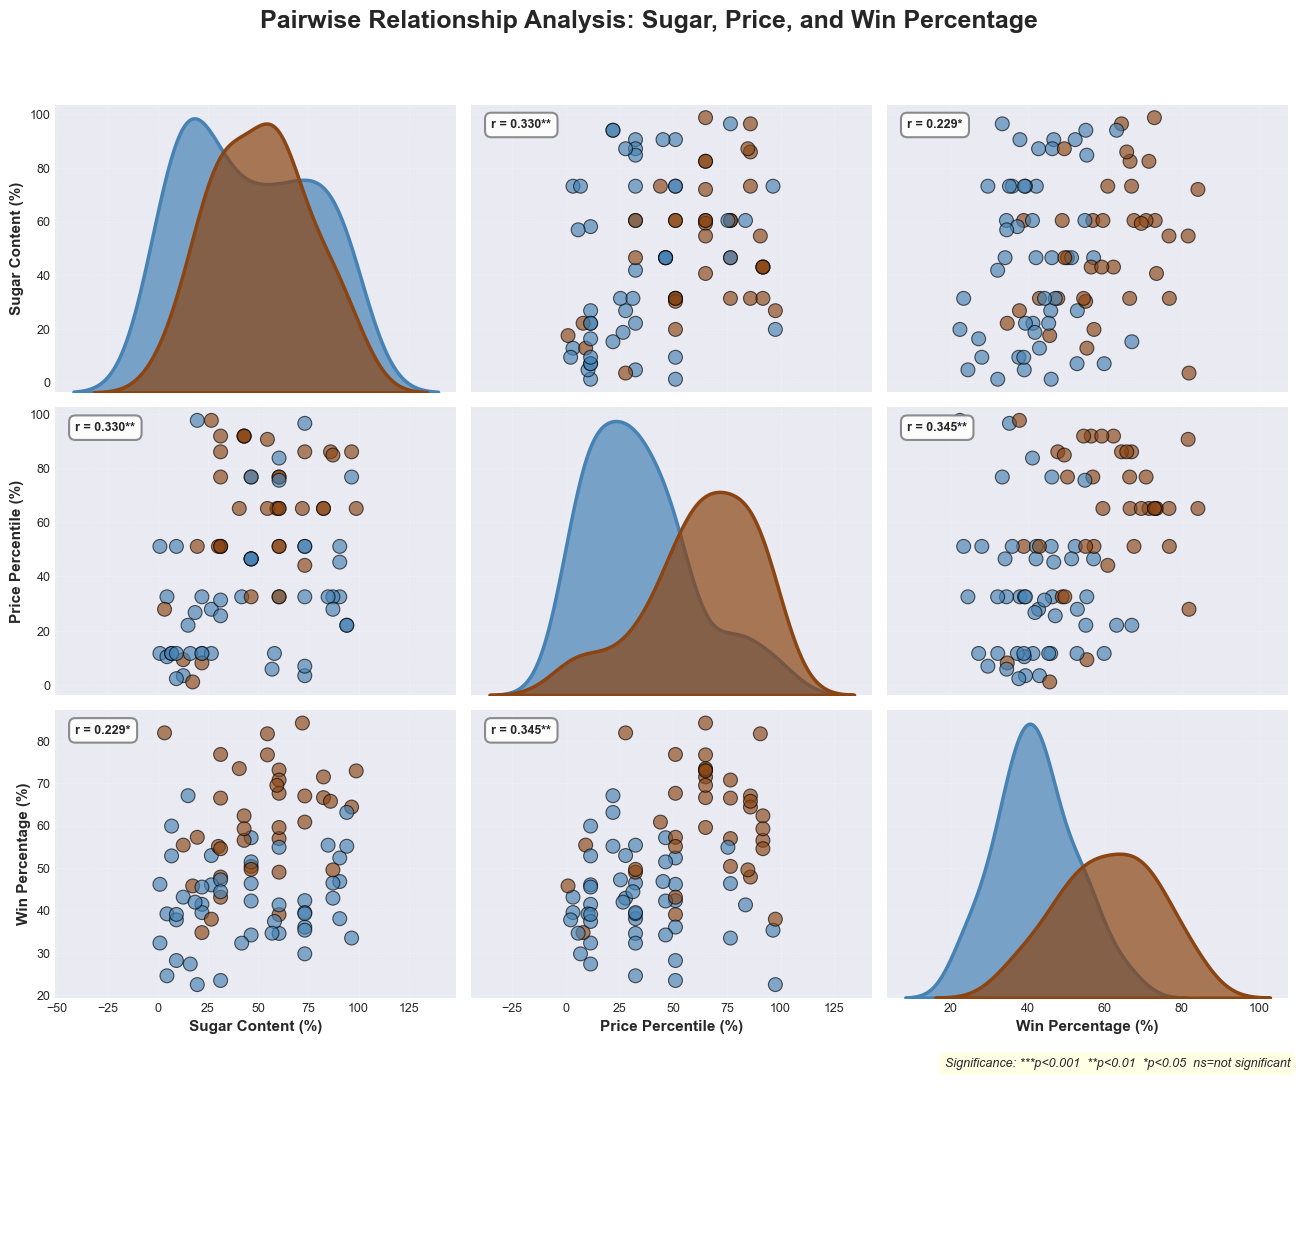

PAIRWISE CORRELATION ANALYSIS - SUMMARY

✓ Pair plot generated successfully

Visualization Components:
  • Diagonal panels: Kernel Density Estimation (KDE) plots showing distributions
  • Off-diagonal panels: Scatter plots with correlation coefficients
  • Color coding: Brown = Chocolate-Based | Blue = Non-Chocolate

Statistical Notations:
  • r = Pearson correlation coefficient (-1 to +1)
  • *** = p < 0.001 (highly significant)
  • **  = p < 0.01  (very significant)
  • *   = p < 0.05  (significant)
  • ns  = p ≥ 0.05  (not significant)

Key Metrics Analyzed:
  • Sample size: 85 products
  • Chocolate-based: 37 products
  • Non-chocolate: 48 products


In [153]:
# Prepare data for pair plot with proper labeling
df_analysis['chocolate_label'] = df_analysis['chocolate'].map({
    1: 'Chocolate-Based', 
    0: 'Non-Chocolate'
})

# Create pair plot with professional styling
pairplot = sns.pairplot(
    df_analysis[['sugar_percent', 'price_percent', 'win_percent', 'chocolate_label']], 
    hue='chocolate_label',
    palette={
        'Chocolate-Based': '#8B4513',  # Saddle brown for chocolate
        'Non-Chocolate': '#4682B4'     # Steel blue for non-chocolate
    },
    diag_kind='kde',
    plot_kws={
        'alpha': 0.65, 
        's': 100, 
        'edgecolor': 'black', 
        'linewidth': 0.8
    },
    diag_kws={
        'alpha': 0.7, 
        'linewidth': 2.5,
        'shade': True
    },
    corner=False,
    height=3.5,
    aspect=1
)

# Set main title with proper spacing
pairplot.fig.suptitle(
    'Pairwise Relationship Analysis: Sugar, Price, and Win Percentage',
    fontsize=18, 
    fontweight='bold', 
    y=1.02
)

# Improve axis labels with units
label_mapping = {
    'sugar_percent': 'Sugar Content (%)',
    'price_percent': 'Price Percentile (%)',
    'win_percent': 'Win Percentage (%)'
}

# Update all axis labels
for i in range(3):
    for j in range(3):
        ax = pairplot.axes[i, j]
        
        # Set x-axis label (bottom row only)
        if i == 2:
            var_name = ['sugar_percent', 'price_percent', 'win_percent'][j]
            ax.set_xlabel(label_mapping[var_name], fontsize=11, fontweight='bold')
        
        # Set y-axis label (left column only)
        if j == 0:
            var_name = ['sugar_percent', 'price_percent', 'win_percent'][i]
            ax.set_ylabel(label_mapping[var_name], fontsize=11, fontweight='bold')
        
        # Add correlation coefficients to scatter plots (off-diagonal)
        if i != j:
            vars_list = ['sugar_percent', 'price_percent', 'win_percent']
            
            # Calculate correlation
            corr = df_analysis[vars_list[j]].corr(df_analysis[vars_list[i]])
            
            # Calculate p-value for statistical significance
            from scipy.stats import pearsonr
            _, p_value = pearsonr(df_analysis[vars_list[j]], df_analysis[vars_list[i]])
            
            # Determine significance marker
            if p_value < 0.001:
                sig = '***'
            elif p_value < 0.01:
                sig = '**'
            elif p_value < 0.05:
                sig = '*'
            else:
                sig = 'ns'
            
            # Position text in corner that doesn't overlap with data
            # Use top-left for positive correlations, bottom-right for negative
            if corr >= 0:
                x_pos, y_pos = 0.05, 0.95
                v_align = 'top'
            else:
                x_pos, y_pos = 0.05, 0.05
                v_align = 'bottom'
            
            # Add correlation text box
            ax.text(
                x_pos, y_pos,
                f'r = {corr:.3f}{sig}',
                transform=ax.transAxes,
                fontsize=9,
                fontweight='bold',
                verticalalignment=v_align,
                horizontalalignment='left',
                bbox=dict(
                    boxstyle='round,pad=0.5',
                    facecolor='white',
                    edgecolor='gray',
                    alpha=0.9,
                    linewidth=1.5
                )
            )
        
        # Improve grid visibility
        ax.grid(True, alpha=0.3, linestyle='--', linewidth=0.5)
        
        # Set tick parameters for better readability
        ax.tick_params(labelsize=9)

# Customize legend
legend = pairplot._legend
legend.set_bbox_to_anchor((0.5, -0.05))
legend.set_loc('upper center')
legend.set_frame_on(True)
legend.get_frame().set_facecolor('white')
legend.get_frame().set_edgecolor('black')
legend.get_frame().set_linewidth(1.5)
legend.get_frame().set_alpha(0.95)

# Update legend title and labels
for text in legend.get_texts():
    text.set_fontsize(11)
    text.set_fontweight('bold')

legend.set_title('Product Category', prop={'size': 12, 'weight': 'bold'})

# Add statistical significance note
pairplot.fig.text(
    0.99, 0.01,
    'Significance: ***p<0.001  **p<0.01  *p<0.05  ns=not significant',
    ha='right',
    va='bottom',
    fontsize=9,
    style='italic',
    bbox=dict(boxstyle='round,pad=0.5', facecolor='lightyellow', alpha=0.8)
)

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0.03, 1, 0.98])

# Create outputs directory if it doesn't exist
os.makedirs("outputs", exist_ok=True)

# Save with high quality
plt.savefig(
    "outputs/01_pairplot_analysis.png",
    dpi=300,
    bbox_inches="tight",
    facecolor="white",
    edgecolor="none"
)

plt.show()

# Print professional summary
print("="*80)
print("PAIRWISE CORRELATION ANALYSIS - SUMMARY")
print("="*80)
print("\n✓ Pair plot generated successfully\n")

print("Visualization Components:")
print("  • Diagonal panels: Kernel Density Estimation (KDE) plots showing distributions")
print("  • Off-diagonal panels: Scatter plots with correlation coefficients")
print("  • Color coding: Brown = Chocolate-Based | Blue = Non-Chocolate\n")

print("Statistical Notations:")
print("  • r = Pearson correlation coefficient (-1 to +1)")
print("  • *** = p < 0.001 (highly significant)")
print("  • **  = p < 0.01  (very significant)")
print("  • *   = p < 0.05  (significant)")
print("  • ns  = p ≥ 0.05  (not significant)\n")

print("Key Metrics Analyzed:")
print(f"  • Sample size: {len(df_analysis)} products")
print(f"  • Chocolate-based: {len(df_analysis[df_analysis['chocolate']==1])} products")
print(f"  • Non-chocolate: {len(df_analysis[df_analysis['chocolate']==0])} products")
print("="*80)

## 4. Sugar vs Price Analysis

**Technique:** Scatter plot with regression line and categorization overlay

**Why:** Understanding the relationship between sugar content and price helps identify:
- Whether higher sugar content correlates with higher prices
- Value propositions (high sugar, low price vs low sugar, high price)
- Market positioning strategies

**Business Value:** Helps manufacturers price products competitively based on sugar content

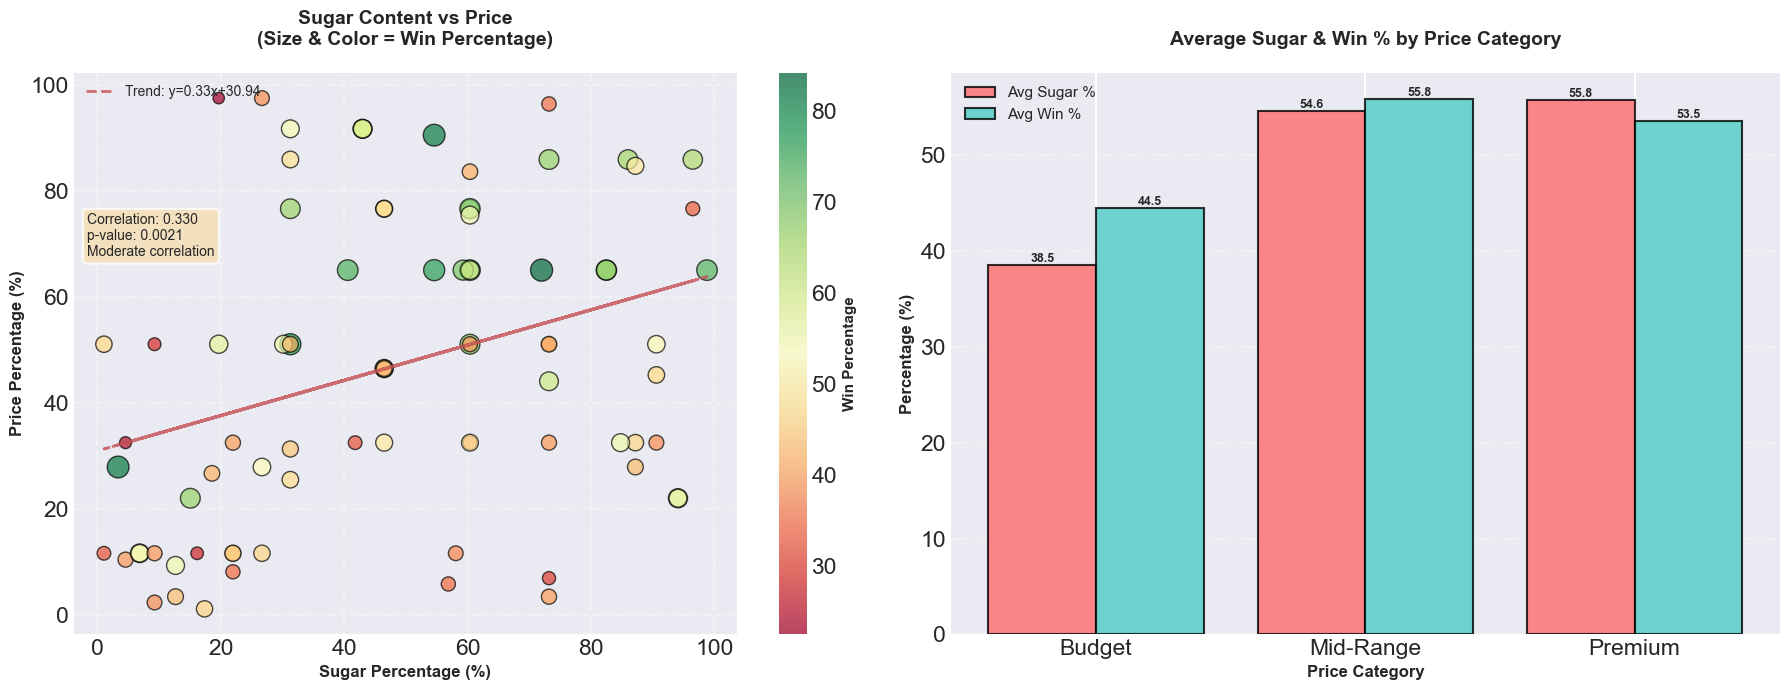


SUGAR VS PRICE ANALYSIS INSIGHTS
Correlation Coefficient: 0.330
Statistical Significance (p-value): 0.0021
✓ Statistically significant relationship

Interpretation: Positive correlation - As sugar content increases, price tends to increase


In [154]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))

# Left plot: Scatter with regression line
scatter = ax1.scatter(df_analysis['sugar_percent'], 
                     df_analysis['price_percent'],
                     c=df_analysis['win_percent'], 
                     s=df_analysis['win_percent']*3,
                     cmap='RdYlGn', 
                     alpha=0.7, 
                     edgecolors='black', 
                     linewidth=1)

# Add regression line
z = np.polyfit(df_analysis['sugar_percent'], df_analysis['price_percent'], 1)
p = np.poly1d(z)
ax1.plot(df_analysis['sugar_percent'], p(df_analysis['sugar_percent']), 
         "r--", linewidth=2, alpha=0.8, label=f'Trend: y={z[0]:.2f}x+{z[1]:.2f}')

# Calculate correlation
corr, p_value = stats.pearsonr(df_analysis['sugar_percent'], df_analysis['price_percent'])

ax1.set_xlabel('Sugar Percentage (%)', fontsize=12, fontweight='bold')
ax1.set_ylabel('Price Percentage (%)', fontsize=12, fontweight='bold')
ax1.set_title('Sugar Content vs Price\n(Size & Color = Win Percentage)', 
              fontsize=14, fontweight='bold', pad=20)
ax1.grid(True, alpha=0.3, linestyle='--')
ax1.legend(loc='upper left', fontsize=10)

# Add correlation text
textstr = f'Correlation: {corr:.3f}\np-value: {p_value:.4f}\n'
textstr += 'Weak positive correlation' if abs(corr) < 0.3 else 'Moderate correlation' if abs(corr) < 0.7 else 'Strong correlation'
ax1.text(
    0.02, 0.75, textstr,
    transform=ax1.transAxes,
    fontsize=10,
    verticalalignment='top',
    bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8)
)


# Add colorbar
cbar1 = plt.colorbar(scatter, ax=ax1)
cbar1.set_label('Win Percentage', fontsize=11, fontweight='bold')

# Right plot: Category-based comparison
category_data = df_analysis.groupby('price_category')[['sugar_percent', 'win_percent']].mean().reset_index()
x_pos = np.arange(len(category_data))

bars1 = ax2.bar(x_pos - 0.2, category_data['sugar_percent'], 
                width=0.4, label='Avg Sugar %', color='#FF6B6B', alpha=0.8, edgecolor='black')
bars2 = ax2.bar(x_pos + 0.2, category_data['win_percent'], 
                width=0.4, label='Avg Win %', color='#4ECDC4', alpha=0.8, edgecolor='black')

ax2.set_xlabel('Price Category', fontsize=12, fontweight='bold')
ax2.set_ylabel('Percentage (%)', fontsize=12, fontweight='bold')
ax2.set_title('Average Sugar & Win % by Price Category', fontsize=14, fontweight='bold', pad=20)
ax2.set_xticks(x_pos)
ax2.set_xticklabels(category_data['price_category'])
ax2.legend(fontsize=11, loc='upper left')
ax2.grid(True, alpha=0.3, linestyle='--', axis='y')

# Add value labels on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.1f}',
                ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.savefig('outputs/02_sugar_vs_price_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\n{'='*80}")
print("SUGAR VS PRICE ANALYSIS INSIGHTS")
print(f"{'='*80}")
print(f"Correlation Coefficient: {corr:.3f}")
print(f"Statistical Significance (p-value): {p_value:.4f}")
if p_value < 0.05:
    print("✓ Statistically significant relationship")
else:
    print("✗ No statistically significant relationship")
print(f"\nInterpretation: {'Positive' if corr > 0 else 'Negative'} correlation - "
      f"As sugar content increases, price tends to {'increase' if corr > 0 else 'decrease'}")

## 5. Sugar Content by Toffee Type

**Technique:** Box plot with violin overlay

**Why:** Box plots show distribution quartiles, outliers, and median values while violin plots show the full distribution shape. This combination provides comprehensive insight into:
- Which toffee types have highest/lowest sugar content
- Variability within each category
- Outliers that don't fit typical patterns

**Decision Support:** Helps product developers understand category norms and identify innovation opportunities

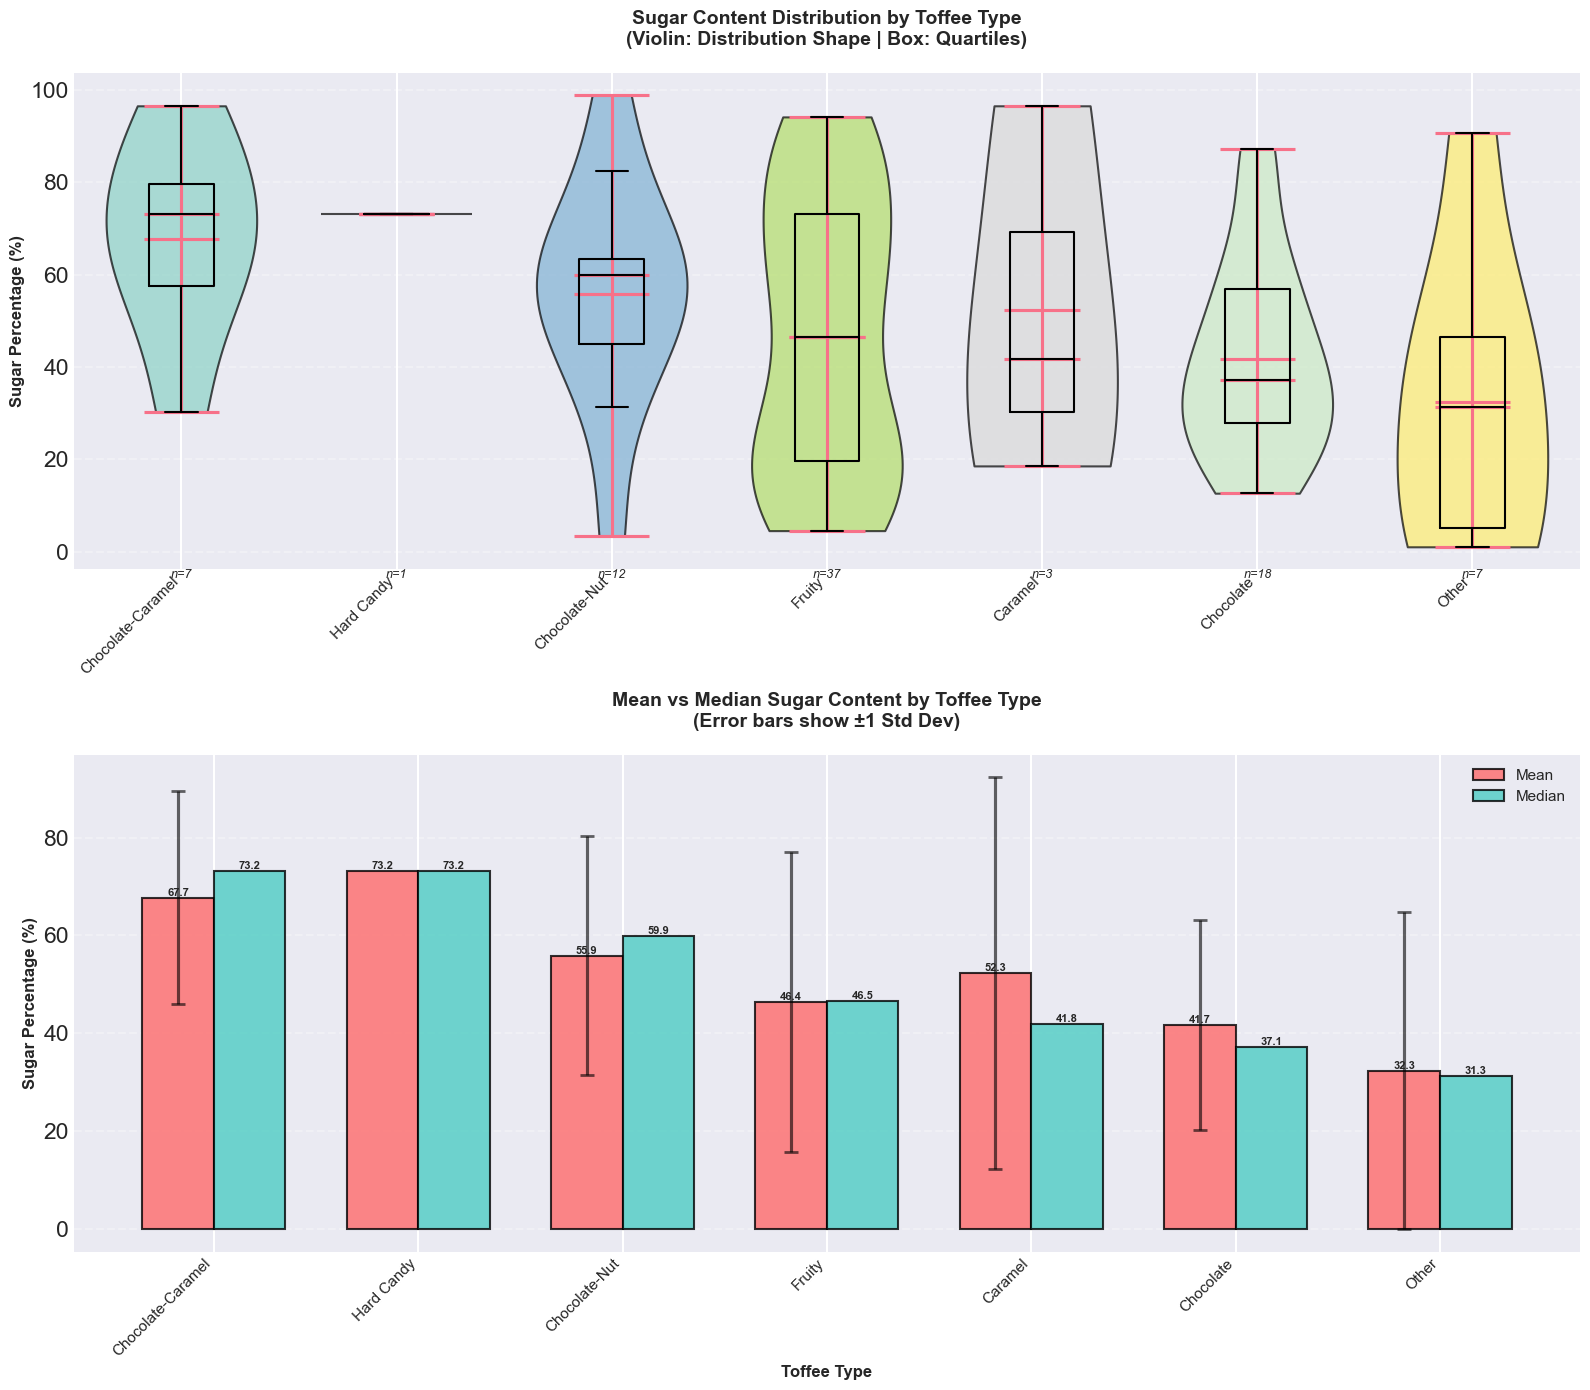


SUGAR CONTENT BY TYPE - STATISTICAL SUMMARY
                    Mean  Median  Std Dev  Count
toffee_type                                     
Chocolate-Caramel 67.730  73.200   21.820      7
Hard Candy        73.200  73.200      NaN      1
Chocolate-Nut     55.850  59.850   24.430     12
Fruity            46.420  46.500   30.650     37
Caramel           52.300  41.800   40.000      3
Chocolate         41.670  37.150   21.380     18
Other             32.340  31.300   32.350      7

Highest Sugar Type: Hard Candy (73.20%)
Lowest Sugar Type: Other (32.34%)


In [155]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 14))

# Top plot: Violin plot with box plot overlay
type_order = df_analysis.groupby('toffee_type')['sugar_percent'].median().sort_values(ascending=False).index

parts = ax1.violinplot([df_analysis[df_analysis['toffee_type']==t]['sugar_percent'].values 
                        for t in type_order],
                       positions=range(len(type_order)),
                       widths=0.7,
                       showmeans=True,
                       showmedians=True)

# Customize violin colors
colors = plt.cm.Set3(np.linspace(0, 1, len(type_order)))
for i, pc in enumerate(parts['bodies']):
    pc.set_facecolor(colors[i])
    pc.set_alpha(0.7)
    pc.set_edgecolor('black')
    pc.set_linewidth(1.5)

# Overlay box plot
bp = ax1.boxplot([df_analysis[df_analysis['toffee_type']==t]['sugar_percent'].values 
                  for t in type_order],
                 positions=range(len(type_order)),
                 widths=0.3,
                 patch_artist=False,
                 showfliers=False)

for element in ['boxes', 'whiskers', 'medians', 'caps']:
    plt.setp(bp[element], color='black', linewidth=1.5)

ax1.set_xticks(range(len(type_order)))
ax1.set_xticklabels(type_order, rotation=45, ha='right', fontsize=11)
ax1.set_ylabel('Sugar Percentage (%)', fontsize=12, fontweight='bold')
ax1.set_title('Sugar Content Distribution by Toffee Type\n(Violin: Distribution Shape | Box: Quartiles)', 
              fontsize=14, fontweight='bold', pad=20)
ax1.grid(True, alpha=0.3, linestyle='--', axis='y')

# Add sample size annotations
for i, ttype in enumerate(type_order):
    count = len(df_analysis[df_analysis['toffee_type']==ttype])
    ax1.text(i, ax1.get_ylim()[0], f'n={count}', 
            ha='center', va='top', fontsize=9, style='italic')

# Bottom plot: Statistical summary
summary_stats = df_analysis.groupby('toffee_type')['sugar_percent'].agg([
    ('Mean', 'mean'),
    ('Median', 'median'),
    ('Std Dev', 'std'),
    ('Count', 'count')
]).round(2)
summary_stats = summary_stats.loc[type_order]

x_pos = np.arange(len(summary_stats))
width = 0.35

bars1 = ax2.bar(x_pos - width/2, summary_stats['Mean'], width, 
                label='Mean', color='#FF6B6B', alpha=0.8, edgecolor='black')
bars2 = ax2.bar(x_pos + width/2, summary_stats['Median'], width, 
                label='Median', color='#4ECDC4', alpha=0.8, edgecolor='black')

# Add error bars for standard deviation
ax2.errorbar(x_pos - width/2, summary_stats['Mean'], 
            yerr=summary_stats['Std Dev'], 
            fmt='none', ecolor='black', capsize=5, capthick=2, alpha=0.6)

ax2.set_xlabel('Toffee Type', fontsize=12, fontweight='bold')
ax2.set_ylabel('Sugar Percentage (%)', fontsize=12, fontweight='bold')
ax2.set_title('Mean vs Median Sugar Content by Toffee Type\n(Error bars show ±1 Std Dev)', 
              fontsize=14, fontweight='bold', pad=20)
ax2.set_xticks(x_pos)
ax2.set_xticklabels(summary_stats.index, rotation=45, ha='right', fontsize=11)
ax2.legend(fontsize=11, loc='upper right')
ax2.grid(True, alpha=0.3, linestyle='--', axis='y')

# Add value labels
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.1f}',
                ha='center', va='bottom', fontsize=8, fontweight='bold')

plt.tight_layout()
plt.savefig('outputs/03_sugar_by_type.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\n{'='*80}")
print("SUGAR CONTENT BY TYPE - STATISTICAL SUMMARY")
print(f"{'='*80}")
print(summary_stats)
print(f"\nHighest Sugar Type: {summary_stats['Mean'].idxmax()} ({summary_stats['Mean'].max():.2f}%)")
print(f"Lowest Sugar Type: {summary_stats['Mean'].idxmin()} ({summary_stats['Mean'].min():.2f}%)")

## 6. Top & Bottom Performers

**Technique:** Horizontal bar charts with color gradients

**Why:** Horizontal bars are ideal for displaying ranked data with long labels (toffee names). Color gradients provide visual hierarchy. This analysis identifies:
- Market winners and losers
- Characteristics of successful products
- Opportunities for product improvement

**Strategic Value:** Benchmarking tool for competitive analysis and product development

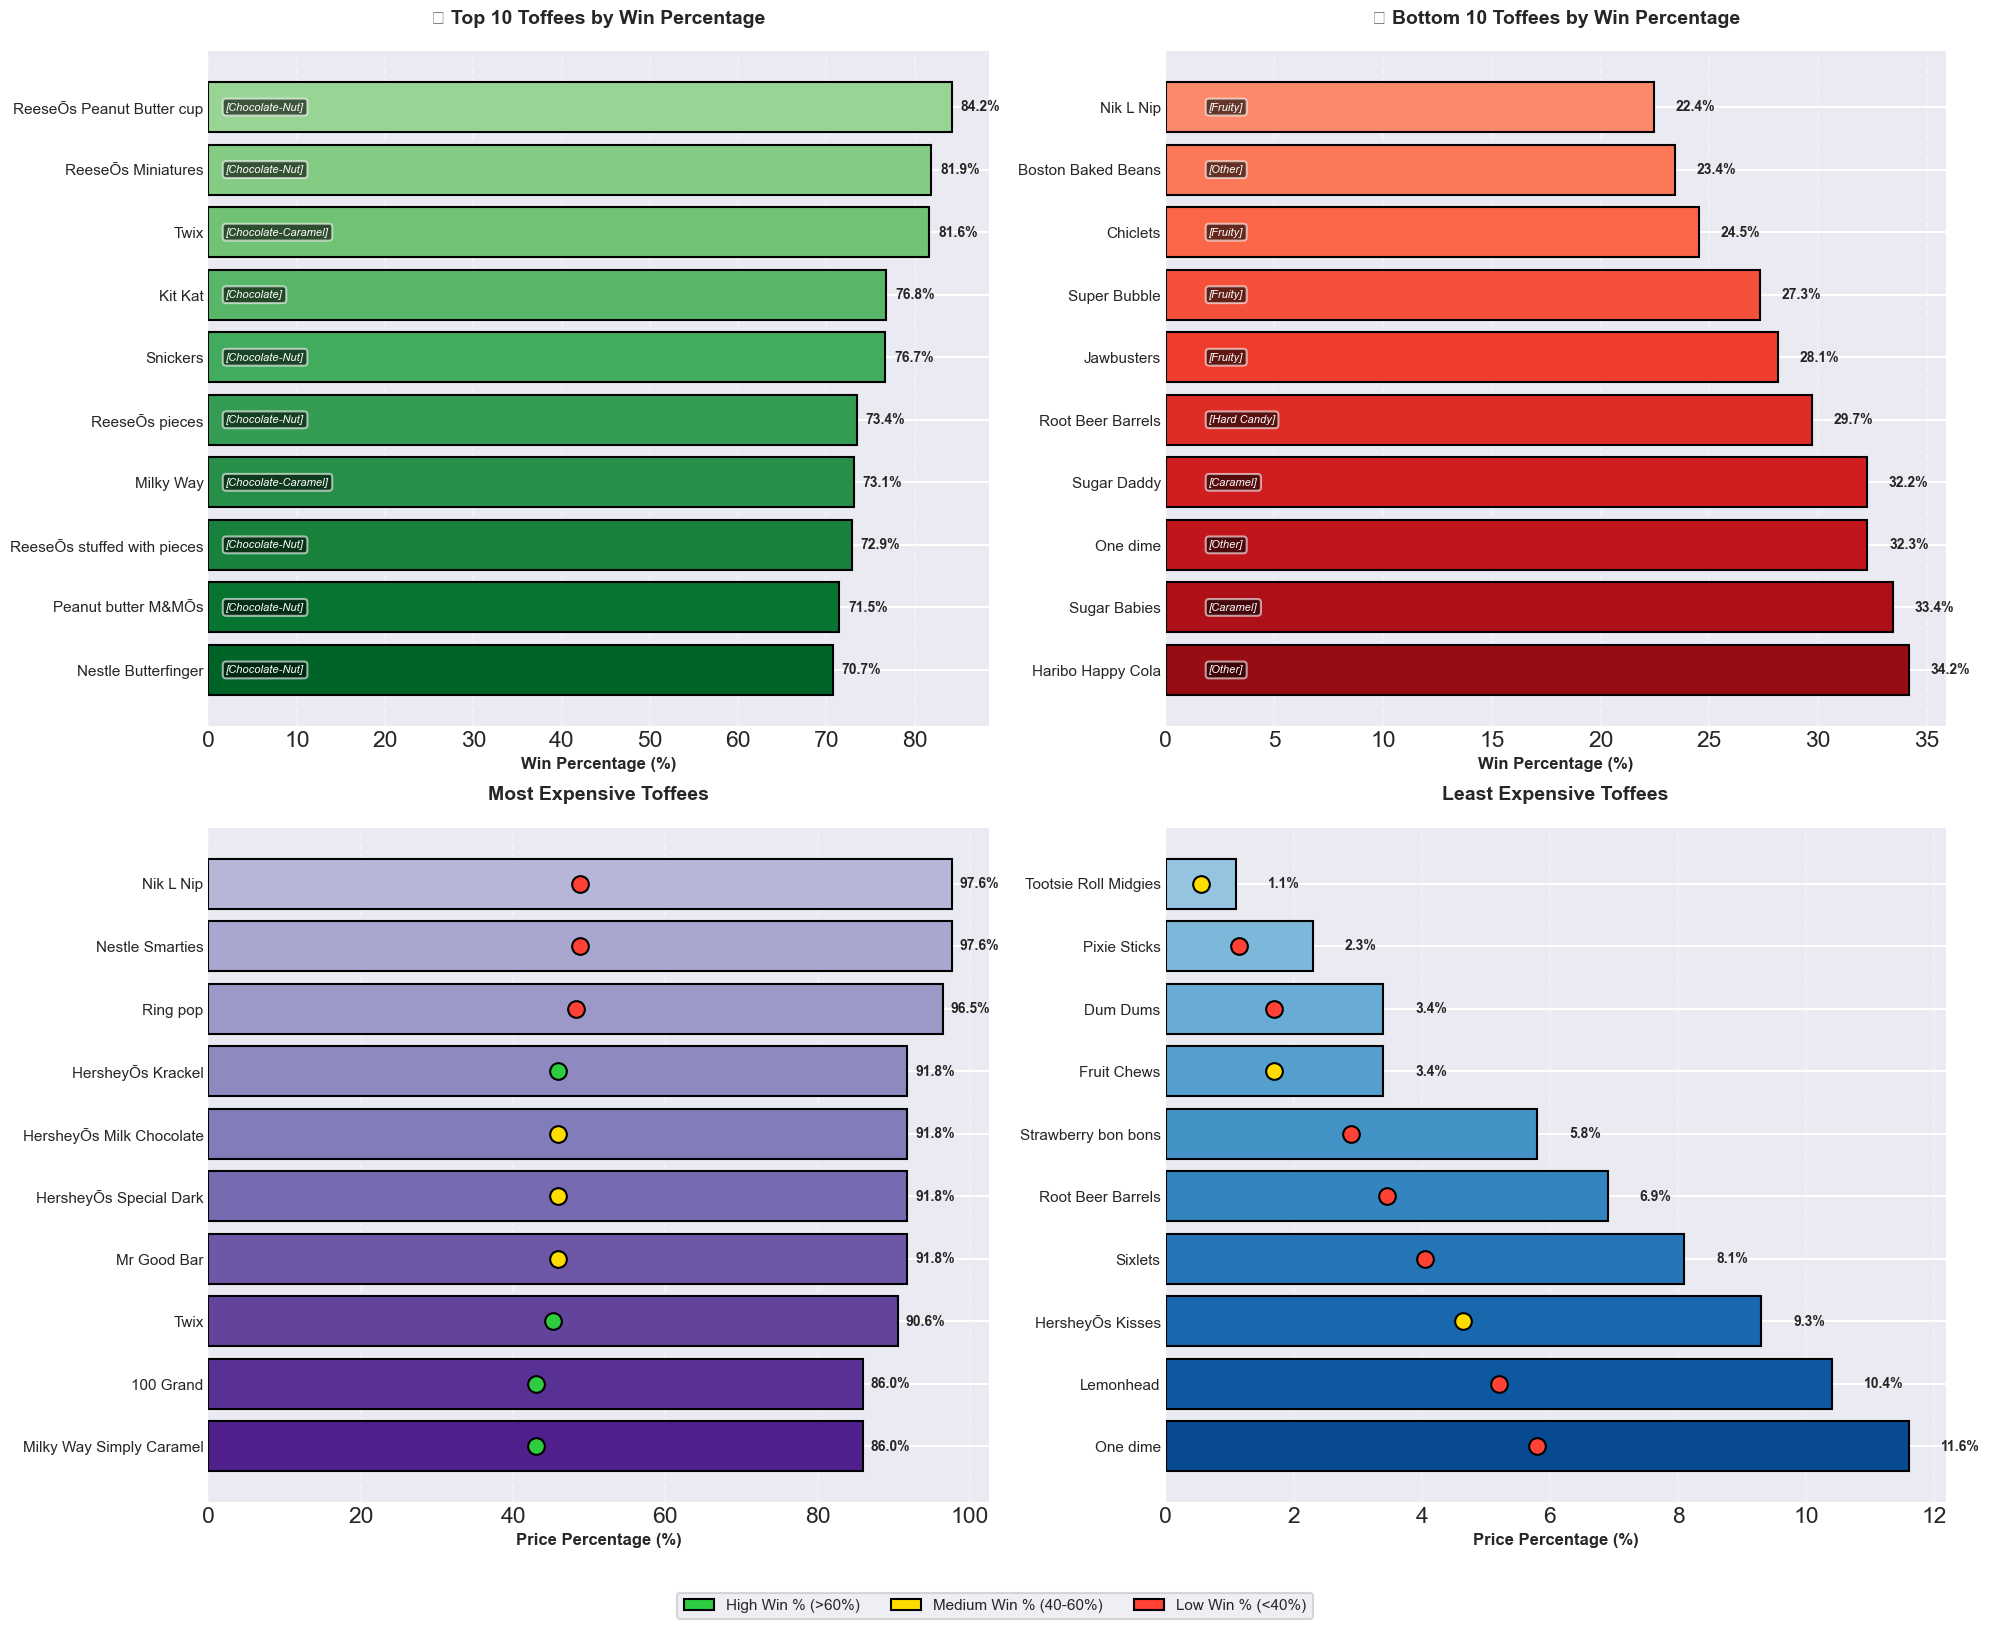


PERFORMANCE ANALYSIS SUMMARY

CHAMPION: ReeseÕs Peanut Butter cup - 84.18%
LOWEST: Nik L Nip - 22.45%

MOST EXPENSIVE: Nik L Nip - 97.60%
LEAST EXPENSIVE: Tootsie Roll Midgies - 1.10%


In [156]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 16))

# Top 10 by Win Percentage
top10 = df_analysis.nlargest(10, 'win_percent')[['competitorname', 'win_percent', 'toffee_type']]
colors_top = plt.cm.Greens(np.linspace(0.4, 0.9, len(top10)))
bars1 = ax1.barh(range(len(top10)), top10['win_percent'], 
                 color=colors_top, edgecolor='black', linewidth=1.5)
ax1.set_yticks(range(len(top10)))
ax1.set_yticklabels(top10['competitorname'], fontsize=11)
ax1.set_xlabel('Win Percentage (%)', fontsize=12, fontweight='bold')
ax1.set_title('🏆 Top 10 Toffees by Win Percentage', fontsize=14, fontweight='bold', pad=20)
ax1.grid(True, alpha=0.3, linestyle='--', axis='x')
ax1.invert_yaxis()

# Add value labels and type annotations
for i, (idx, row) in enumerate(top10.iterrows()):
    ax1.text(row['win_percent'] + 1, i, f"{row['win_percent']:.1f}%", 
            va='center', fontsize=10, fontweight='bold')
    ax1.text(2, i, f"[{row['toffee_type']}]", 
            va='center', fontsize=8, style='italic', color='white', 
            bbox=dict(boxstyle='round', facecolor='black', alpha=0.6))

# Bottom 10 by Win Percentage
bottom10 = df_analysis.nsmallest(10, 'win_percent')[['competitorname', 'win_percent', 'toffee_type']]
colors_bottom = plt.cm.Reds(np.linspace(0.4, 0.9, len(bottom10)))
bars2 = ax2.barh(range(len(bottom10)), bottom10['win_percent'], 
                 color=colors_bottom, edgecolor='black', linewidth=1.5)
ax2.set_yticks(range(len(bottom10)))
ax2.set_yticklabels(bottom10['competitorname'], fontsize=11)
ax2.set_xlabel('Win Percentage (%)', fontsize=12, fontweight='bold')
ax2.set_title('📉 Bottom 10 Toffees by Win Percentage', fontsize=14, fontweight='bold', pad=20)
ax2.grid(True, alpha=0.3, linestyle='--', axis='x')
ax2.invert_yaxis()

for i, (idx, row) in enumerate(bottom10.iterrows()):
    ax2.text(row['win_percent'] + 1, i, f"{row['win_percent']:.1f}%", 
            va='center', fontsize=10, fontweight='bold')
    ax2.text(2, i, f"[{row['toffee_type']}]", 
            va='center', fontsize=8, style='italic', color='white',
            bbox=dict(boxstyle='round', facecolor='black', alpha=0.6))

# Most Expensive
most_expensive = df_analysis.nlargest(10, 'price_percent')[['competitorname', 'price_percent', 'win_percent']]
colors_exp = plt.cm.Purples(np.linspace(0.4, 0.9, len(most_expensive)))
bars3 = ax3.barh(range(len(most_expensive)), most_expensive['price_percent'], 
                 color=colors_exp, edgecolor='black', linewidth=1.5)
ax3.set_yticks(range(len(most_expensive)))
ax3.set_yticklabels(most_expensive['competitorname'], fontsize=11)
ax3.set_xlabel('Price Percentage (%)', fontsize=12, fontweight='bold')
ax3.set_title('Most Expensive Toffees', fontsize=14, fontweight='bold', pad=20)
ax3.grid(True, alpha=0.3, linestyle='--', axis='x')
ax3.invert_yaxis()

for i, (idx, row) in enumerate(most_expensive.iterrows()):
    ax3.text(row['price_percent'] + 1, i, f"{row['price_percent']:.1f}%", 
            va='center', fontsize=10, fontweight='bold')
    # Add win % as indicator
    win_color = '#2ECC40' if row['win_percent'] > 60 else '#FF4136' if row['win_percent'] < 40 else '#FFDC00'
    ax3.plot(row['price_percent']/2, i, 'o', markersize=12, 
            color=win_color, markeredgecolor='black', markeredgewidth=1.5)

# Least Expensive
least_expensive = df_analysis.nsmallest(10, 'price_percent')[['competitorname', 'price_percent', 'win_percent']]
colors_cheap = plt.cm.Blues(np.linspace(0.4, 0.9, len(least_expensive)))
bars4 = ax4.barh(range(len(least_expensive)), least_expensive['price_percent'], 
                 color=colors_cheap, edgecolor='black', linewidth=1.5)
ax4.set_yticks(range(len(least_expensive)))
ax4.set_yticklabels(least_expensive['competitorname'], fontsize=11)
ax4.set_xlabel('Price Percentage (%)', fontsize=12, fontweight='bold')
ax4.set_title('Least Expensive Toffees', fontsize=14, fontweight='bold', pad=20)
ax4.grid(True, alpha=0.3, linestyle='--', axis='x')
ax4.invert_yaxis()

for i, (idx, row) in enumerate(least_expensive.iterrows()):
    ax4.text(row['price_percent'] + 0.5, i, f"{row['price_percent']:.1f}%", 
            va='center', fontsize=10, fontweight='bold')
    win_color = '#2ECC40' if row['win_percent'] > 60 else '#FF4136' if row['win_percent'] < 40 else '#FFDC00'
    ax4.plot(row['price_percent']/2, i, 'o', markersize=12, 
            color=win_color, markeredgecolor='black', markeredgewidth=1.5)

# Add legend for win percentage indicators
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='#2ECC40', edgecolor='black', label='High Win % (>60%)'),
                  Patch(facecolor='#FFDC00', edgecolor='black', label='Medium Win % (40-60%)'),
                  Patch(facecolor='#FF4136', edgecolor='black', label='Low Win % (<40%)')]
fig.legend(handles=legend_elements, loc='lower center', ncol=3, fontsize=11, frameon=True, 
          bbox_to_anchor=(0.5, -0.02))

plt.tight_layout(rect=[0, 0.02, 1, 1])
plt.savefig('outputs/04_top_bottom_performers.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\n{'='*80}")
print("PERFORMANCE ANALYSIS SUMMARY")
print(f"{'='*80}")
print(f"\nCHAMPION: {top10.iloc[0]['competitorname']} - {top10.iloc[0]['win_percent']:.2f}%")
print(f"LOWEST: {bottom10.iloc[0]['competitorname']} - {bottom10.iloc[0]['win_percent']:.2f}%")
print(f"\nMOST EXPENSIVE: {most_expensive.iloc[0]['competitorname']} - {most_expensive.iloc[0]['price_percent']:.2f}%")
print(f"LEAST EXPENSIVE: {least_expensive.iloc[0]['competitorname']} - {least_expensive.iloc[0]['price_percent']:.2f}%")

## 7. Correlation Analysis with Target Variable

**Technique:** Heatmap and correlation coefficient analysis

**Why:** Correlation heatmaps provide a comprehensive view of relationships between all variables. Understanding which characteristics correlate with win percentage helps:
- Identify key success factors
- Guide product formulation decisions
- Predict performance of new products

**Statistical Rigor:** Includes significance testing to distinguish meaningful correlations from random noise

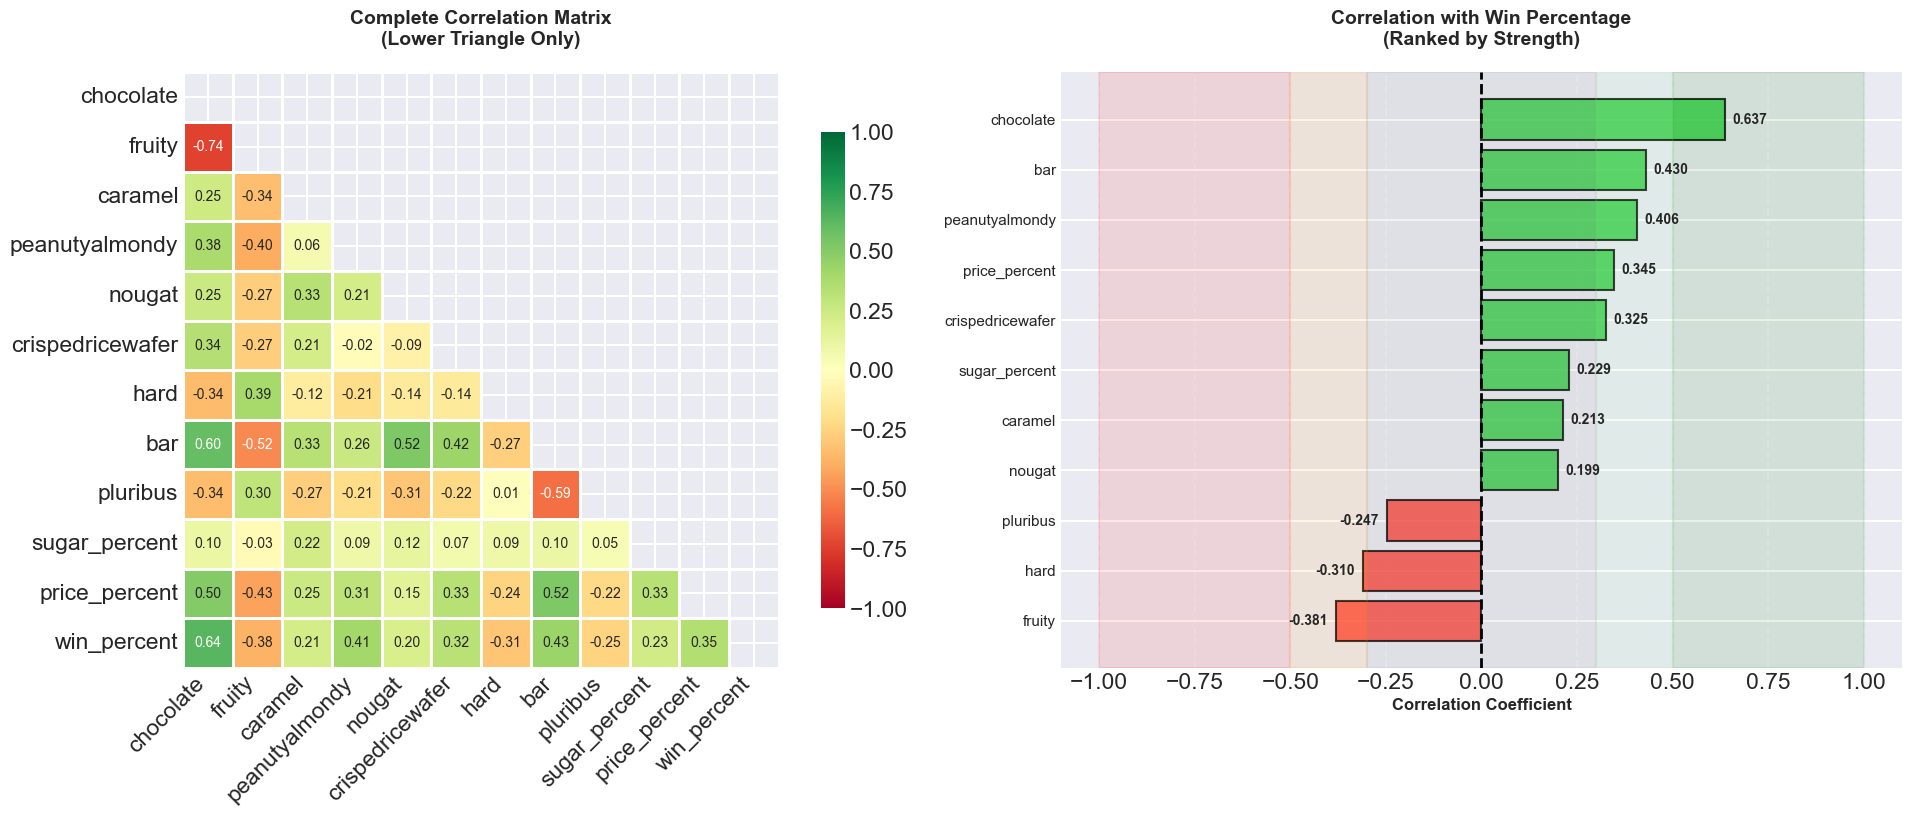


CORRELATION WITH WIN PERCENTAGE - DETAILED ANALYSIS

Strongest Positive Correlations:
chocolate        0.637
bar              0.430
peanutyalmondy   0.406
Name: win_percent, dtype: float64

Strongest Negative Correlations:
fruity     -0.381
hard       -0.310
pluribus   -0.247
Name: win_percent, dtype: float64

STATISTICAL SIGNIFICANCE TESTS
fruity              : r=-0.381, p=0.0003 ***
hard                : r=-0.310, p=0.0038 **
pluribus            : r=-0.247, p=0.0224 *
nougat              : r= 0.199, p=0.0673 ns
caramel             : r= 0.213, p=0.0499 *
sugar_percent       : r= 0.229, p=0.0349 *
crispedricewafer    : r= 0.325, p=0.0024 **
price_percent       : r= 0.345, p=0.0012 **
peanutyalmondy      : r= 0.406, p=0.0001 ***
bar                 : r= 0.430, p=0.0000 ***
chocolate           : r= 0.637, p=0.0000 ***


In [157]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Calculate correlation matrix for all characteristics
char_cols = ['chocolate', 'fruity', 'caramel', 'peanutyalmondy', 'nougat', 
             'crispedricewafer', 'hard', 'bar', 'pluribus', 
             'sugar_percent', 'price_percent', 'win_percent']
corr_matrix = df_analysis[char_cols].corr()

# Full correlation heatmap
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f', 
            cmap='RdYlGn', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8},
            ax=ax1, vmin=-1, vmax=1)
ax1.set_title('Complete Correlation Matrix\n(Lower Triangle Only)', 
              fontsize=14, fontweight='bold', pad=20)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')

# Correlation with win percentage (focused view)
win_corr = corr_matrix['win_percent'].drop('win_percent').sort_values(ascending=True)
colors = ['#FF4136' if x < 0 else '#2ECC40' for x in win_corr.values]

bars = ax2.barh(range(len(win_corr)), win_corr.values, 
                color=colors, edgecolor='black', linewidth=1.5, alpha=0.8)
ax2.set_yticks(range(len(win_corr)))
ax2.set_yticklabels(win_corr.index, fontsize=11)
ax2.set_xlabel('Correlation Coefficient', fontsize=12, fontweight='bold')
ax2.set_title('Correlation with Win Percentage\n(Ranked by Strength)', 
              fontsize=14, fontweight='bold', pad=20)
ax2.axvline(x=0, color='black', linestyle='--', linewidth=2)
ax2.grid(True, alpha=0.3, linestyle='--', axis='x')

# Add value labels
for i, (idx, val) in enumerate(win_corr.items()):
    ax2.text(val + 0.02 if val > 0 else val - 0.02, i, f'{val:.3f}', 
            va='center', ha='left' if val > 0 else 'right', 
            fontsize=10, fontweight='bold')

# Add interpretation zones
ax2.axvspan(-1, -0.5, alpha=0.1, color='red', label='Strong Negative')
ax2.axvspan(-0.5, -0.3, alpha=0.1, color='orange', label='Moderate Negative')
ax2.axvspan(-0.3, 0.3, alpha=0.1, color='gray', label='Weak/No Correlation')
ax2.axvspan(0.3, 0.5, alpha=0.1, color='lightgreen', label='Moderate Positive')
ax2.axvspan(0.5, 1, alpha=0.1, color='green', label='Strong Positive')

plt.tight_layout()
plt.savefig('outputs/05_correlation_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\n{'='*80}")
print("CORRELATION WITH WIN PERCENTAGE - DETAILED ANALYSIS")
print(f"{'='*80}")
print("\nStrongest Positive Correlations:")
print(win_corr.nlargest(3))
print("\nStrongest Negative Correlations:")
print(win_corr.nsmallest(3))

# Statistical significance testing
print(f"\n{'='*80}")
print("STATISTICAL SIGNIFICANCE TESTS")
print(f"{'='*80}")
for feature in win_corr.index:
    corr_coef, p_val = stats.pearsonr(df_analysis[feature], df_analysis['win_percent'])
    sig = '***' if p_val < 0.001 else '**' if p_val < 0.01 else '*' if p_val < 0.05 else 'ns'
    print(f"{feature:20s}: r={corr_coef:6.3f}, p={p_val:.4f} {sig}")

## 8. Multi-Dimensional Performance Analysis

**Technique:** Bubble chart (3D scatter plot in 2D)

**Why:** Bubble charts allow visualization of 4 dimensions simultaneously:
- X-axis: Sugar percentage
- Y-axis: Win percentage
- Bubble size: Price
- Bubble color: Toffee type

**Strategic Insight:** Identifies sweet spots where products achieve high win rates with optimal sugar-price combinations

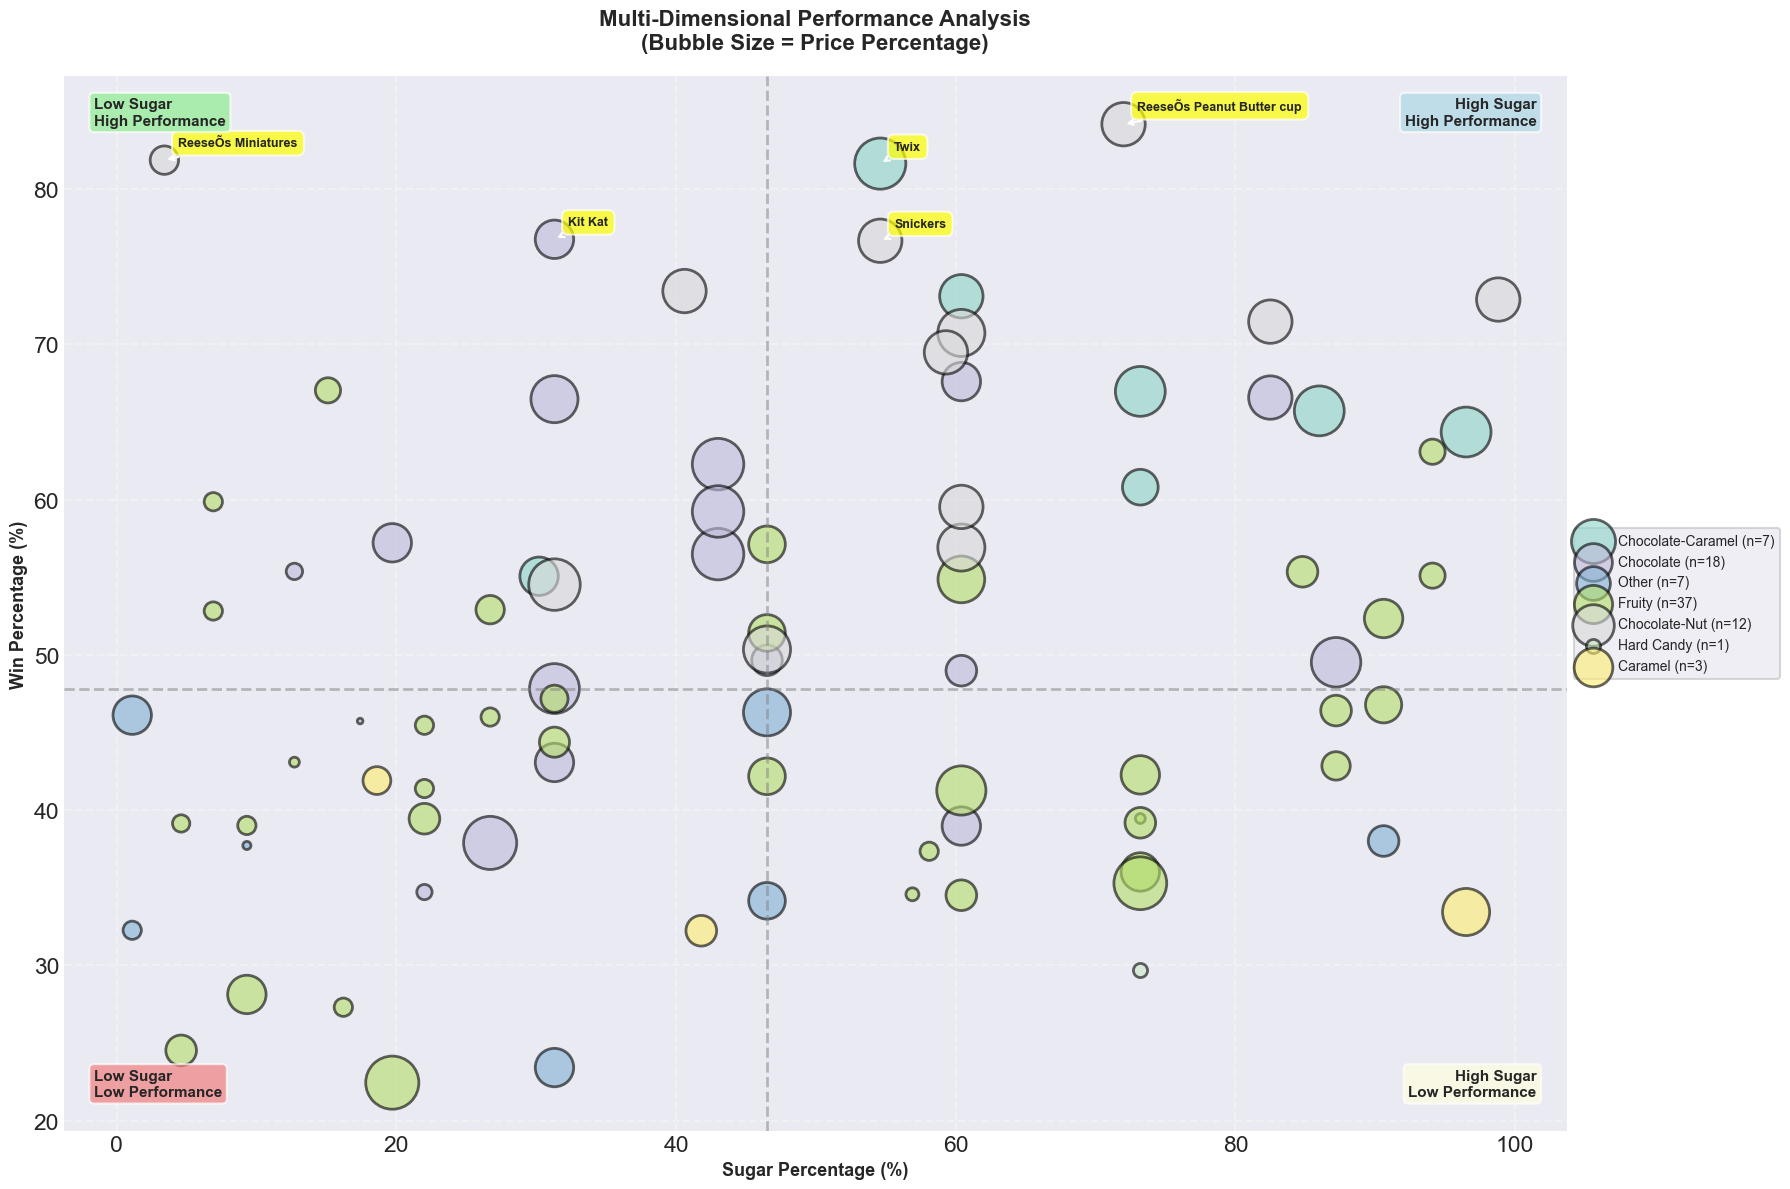


QUADRANT ANALYSIS

Q1 - Low Sugar, High Performance: 16 products
Q2 - High Sugar, High Performance: 27 products
Q3 - Low Sugar, Low Performance: 23 products
Q4 - High Sugar, Low Performance: 19 products


In [158]:
fig, ax = plt.subplots(figsize=(18, 12))

# Create color map for toffee types
toffee_types = df_analysis['toffee_type'].unique()
color_map = dict(zip(toffee_types, plt.cm.Set3(np.linspace(0, 1, len(toffee_types)))))

# Create bubble chart
for ttype in toffee_types:
    data = df_analysis[df_analysis['toffee_type'] == ttype]
    ax.scatter(data['sugar_percent'], 
              data['win_percent'],
              s=data['price_percent']*15,  # Size based on price
              c=[color_map[ttype]], 
              alpha=0.6, 
              edgecolors='black', 
              linewidth=2,
              label=f'{ttype} (n={len(data)})')

# Add annotations for top performers
top_5 = df_analysis.nlargest(5, 'win_percent')
for idx, row in top_5.iterrows():
    ax.annotate(row['competitorname'], 
               xy=(row['sugar_percent'], row['win_percent']),
               xytext=(10, 10), textcoords='offset points',
               fontsize=9, fontweight='bold',
               bbox=dict(boxstyle='round,pad=0.5', facecolor='yellow', alpha=0.7),
               arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0', lw=1.5))

# Add quadrant lines
ax.axhline(y=df_analysis['win_percent'].median(), color='gray', linestyle='--', linewidth=2, alpha=0.5)
ax.axvline(x=df_analysis['sugar_percent'].median(), color='gray', linestyle='--', linewidth=2, alpha=0.5)

# Quadrant labels
# Quadrant labels using axis-relative positioning
ax.text(
    0.02, 0.98,
    'Low Sugar\nHigh Performance',
    transform=ax.transAxes,
    fontsize=11,
    fontweight='bold',
    va='top',
    bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.7)
)

ax.text(
    0.98, 0.98,
    'High Sugar\nHigh Performance',
    transform=ax.transAxes,
    fontsize=11,
    fontweight='bold',
    va='top',
    ha='right',
    bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.7)
)

ax.text(
    0.02, 0.03,
    'Low Sugar\nLow Performance',
    transform=ax.transAxes,
    fontsize=11,
    fontweight='bold',
    va='bottom',
    bbox=dict(boxstyle='round', facecolor='lightcoral', alpha=0.7)
)

ax.text(
    0.98, 0.03,
    'High Sugar\nLow Performance',
    transform=ax.transAxes,
    fontsize=11,
    fontweight='bold',
    va='bottom',
    ha='right',
    bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.7)
)


ax.set_xlabel('Sugar Percentage (%)', fontsize=13, fontweight='bold')
ax.set_ylabel('Win Percentage (%)', fontsize=13, fontweight='bold')
ax.set_title('Multi-Dimensional Performance Analysis\n(Bubble Size = Price Percentage)', 
            fontsize=16, fontweight='bold', pad=20)
ax.grid(True, alpha=0.3, linestyle='--')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=10, frameon=True)

plt.tight_layout()
plt.savefig('outputs/06_multidimensional_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\n{'='*80}")
print("QUADRANT ANALYSIS")
print(f"{'='*80}")
median_sugar = df_analysis['sugar_percent'].median()
median_win = df_analysis['win_percent'].median()

q1 = df_analysis[(df_analysis['sugar_percent'] < median_sugar) & (df_analysis['win_percent'] >= median_win)]
q2 = df_analysis[(df_analysis['sugar_percent'] >= median_sugar) & (df_analysis['win_percent'] >= median_win)]
q3 = df_analysis[(df_analysis['sugar_percent'] < median_sugar) & (df_analysis['win_percent'] < median_win)]
q4 = df_analysis[(df_analysis['sugar_percent'] >= median_sugar) & (df_analysis['win_percent'] < median_win)]

print(f"\nQ1 - Low Sugar, High Performance: {len(q1)} products")
print(f"Q2 - High Sugar, High Performance: {len(q2)} products")
print(f"Q3 - Low Sugar, Low Performance: {len(q3)} products")
print(f"Q4 - High Sugar, Low Performance: {len(q4)} products")

## 9. Ingredient Impact Analysis

**Technique:** Grouped bar chart with confidence intervals

**Why:** This analysis reveals the average win percentage for toffees with vs without each ingredient. Understanding ingredient impact helps:
- Formulation optimization
- Cost-benefit analysis of premium ingredients
- Marketing message development

**Statistical Note:** Error bars show 95% confidence intervals to indicate reliability of differences

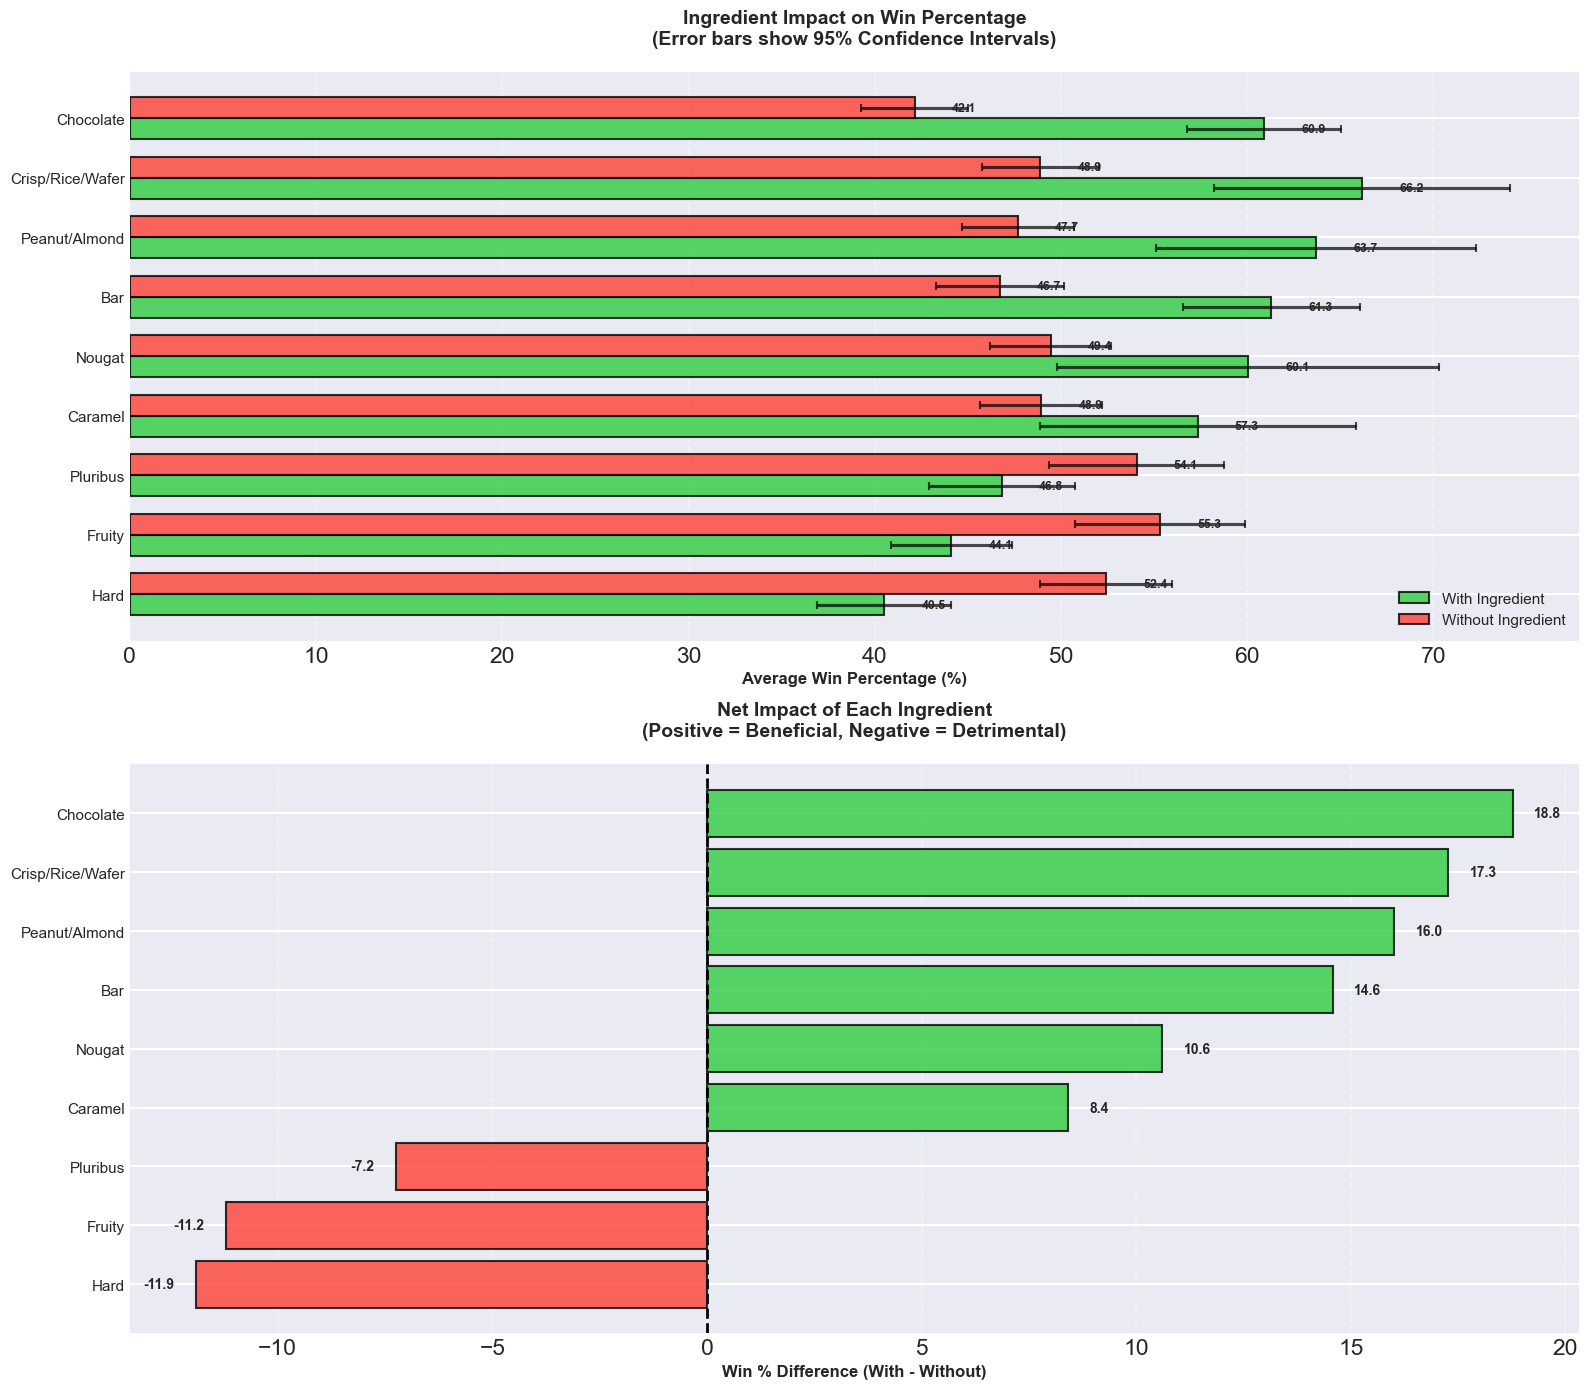


INGREDIENT IMPACT ANALYSIS

Most Beneficial Ingredients:
         ingredient  difference
0         chocolate      18.779
5  crisp/rice/wafer      17.276
3     peanut/almond      16.019

Most Detrimental Ingredients:
  ingredient  difference
6       hard     -11.909
1     fruity     -11.207
8   pluribus      -7.244


In [159]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 14))

# Ingredient impact on win percentage
ingredients = ['chocolate', 'fruity', 'caramel', 'peanutyalmondy', 'nougat', 
               'crispedricewafer', 'hard', 'bar', 'pluribus']

impact_data = []
for ing in ingredients:
    with_ing = df_analysis[df_analysis[ing] == 1]['win_percent'].mean()
    without_ing = df_analysis[df_analysis[ing] == 0]['win_percent'].mean()
    with_std = df_analysis[df_analysis[ing] == 1]['win_percent'].std()
    without_std = df_analysis[df_analysis[ing] == 0]['win_percent'].std()
    with_n = len(df_analysis[df_analysis[ing] == 1])
    without_n = len(df_analysis[df_analysis[ing] == 0])
    
    impact_data.append({
        'ingredient': ing.replace('peanutyalmondy', 'peanut/almond').replace('crispedricewafer', 'crisp/rice/wafer'),
        'with': with_ing,
        'without': without_ing,
        'difference': with_ing - without_ing,
        'with_std': with_std,
        'without_std': without_std,
        'with_n': with_n,
        'without_n': without_n
    })

impact_df = pd.DataFrame(impact_data).sort_values('difference', ascending=True)

x_pos = np.arange(len(impact_df))
width = 0.35

# Calculate 95% confidence intervals
with_ci = 1.96 * impact_df['with_std'] / np.sqrt(impact_df['with_n'])
without_ci = 1.96 * impact_df['without_std'] / np.sqrt(impact_df['without_n'])

bars1 = ax1.barh(x_pos - width/2, impact_df['with'], width,
                label='With Ingredient', color='#2ECC40', alpha=0.8, edgecolor='black', linewidth=1.5)
bars2 = ax1.barh(x_pos + width/2, impact_df['without'], width,
                label='Without Ingredient', color='#FF4136', alpha=0.8, edgecolor='black', linewidth=1.5)

# Add error bars
ax1.errorbar(impact_df['with'], x_pos - width/2, xerr=with_ci, 
            fmt='none', ecolor='black', capsize=3, capthick=1.5, alpha=0.7)
ax1.errorbar(impact_df['without'], x_pos + width/2, xerr=without_ci, 
            fmt='none', ecolor='black', capsize=3, capthick=1.5, alpha=0.7)

ax1.set_yticks(x_pos)
ax1.set_yticklabels(impact_df['ingredient'].str.title(), fontsize=11)
ax1.set_xlabel('Average Win Percentage (%)', fontsize=12, fontweight='bold')
ax1.set_title('Ingredient Impact on Win Percentage\n(Error bars show 95% Confidence Intervals)', 
             fontsize=14, fontweight='bold', pad=20)
ax1.legend(fontsize=11, loc='lower right')
ax1.grid(True, alpha=0.3, linestyle='--', axis='x')

# Add value labels
for i, row in impact_df.iterrows():
    y_pos = impact_df.index.get_loc(i)
    ax1.text(row['with'] + 2, y_pos - width/2, f"{row['with']:.1f}", 
            va='center', fontsize=9, fontweight='bold')
    ax1.text(row['without'] + 2, y_pos + width/2, f"{row['without']:.1f}", 
            va='center', fontsize=9, fontweight='bold')

# Difference analysis
colors = ['#2ECC40' if x > 0 else '#FF4136' for x in impact_df['difference']]
bars3 = ax2.barh(range(len(impact_df)), impact_df['difference'], 
                color=colors, edgecolor='black', linewidth=1.5, alpha=0.8)
ax2.set_yticks(range(len(impact_df)))
ax2.set_yticklabels(impact_df['ingredient'].str.title(), fontsize=11)
ax2.set_xlabel('Win % Difference (With - Without)', fontsize=12, fontweight='bold')
ax2.set_title('Net Impact of Each Ingredient\n(Positive = Beneficial, Negative = Detrimental)', 
             fontsize=14, fontweight='bold', pad=20)
ax2.axvline(x=0, color='black', linestyle='--', linewidth=2)
ax2.grid(True, alpha=0.3, linestyle='--', axis='x')

for i, (idx, row) in enumerate(impact_df.iterrows()):
    ax2.text(row['difference'] + 0.5 if row['difference'] > 0 else row['difference'] - 0.5, 
            i, f"{row['difference']:.1f}", 
            va='center', ha='left' if row['difference'] > 0 else 'right',
            fontsize=10, fontweight='bold')

plt.tight_layout()
plt.savefig('outputs/07_ingredient_impact.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\n{'='*80}")
print("INGREDIENT IMPACT ANALYSIS")
print(f"{'='*80}")
print("\nMost Beneficial Ingredients:")
print(impact_df.nlargest(3, 'difference')[['ingredient', 'difference']])
print("\nMost Detrimental Ingredients:")
print(impact_df.nsmallest(3, 'difference')[['ingredient', 'difference']])

## 10. Comprehensive Executive Dashboard

**Technique:** Multi-panel dashboard with KPIs

**Why:** Executives need quick, actionable insights. This dashboard combines:
- Key performance indicators (KPIs)
- Distribution analysis
- Trend identification
- Competitive positioning

**Business Value:** One-page summary for strategic decision-making

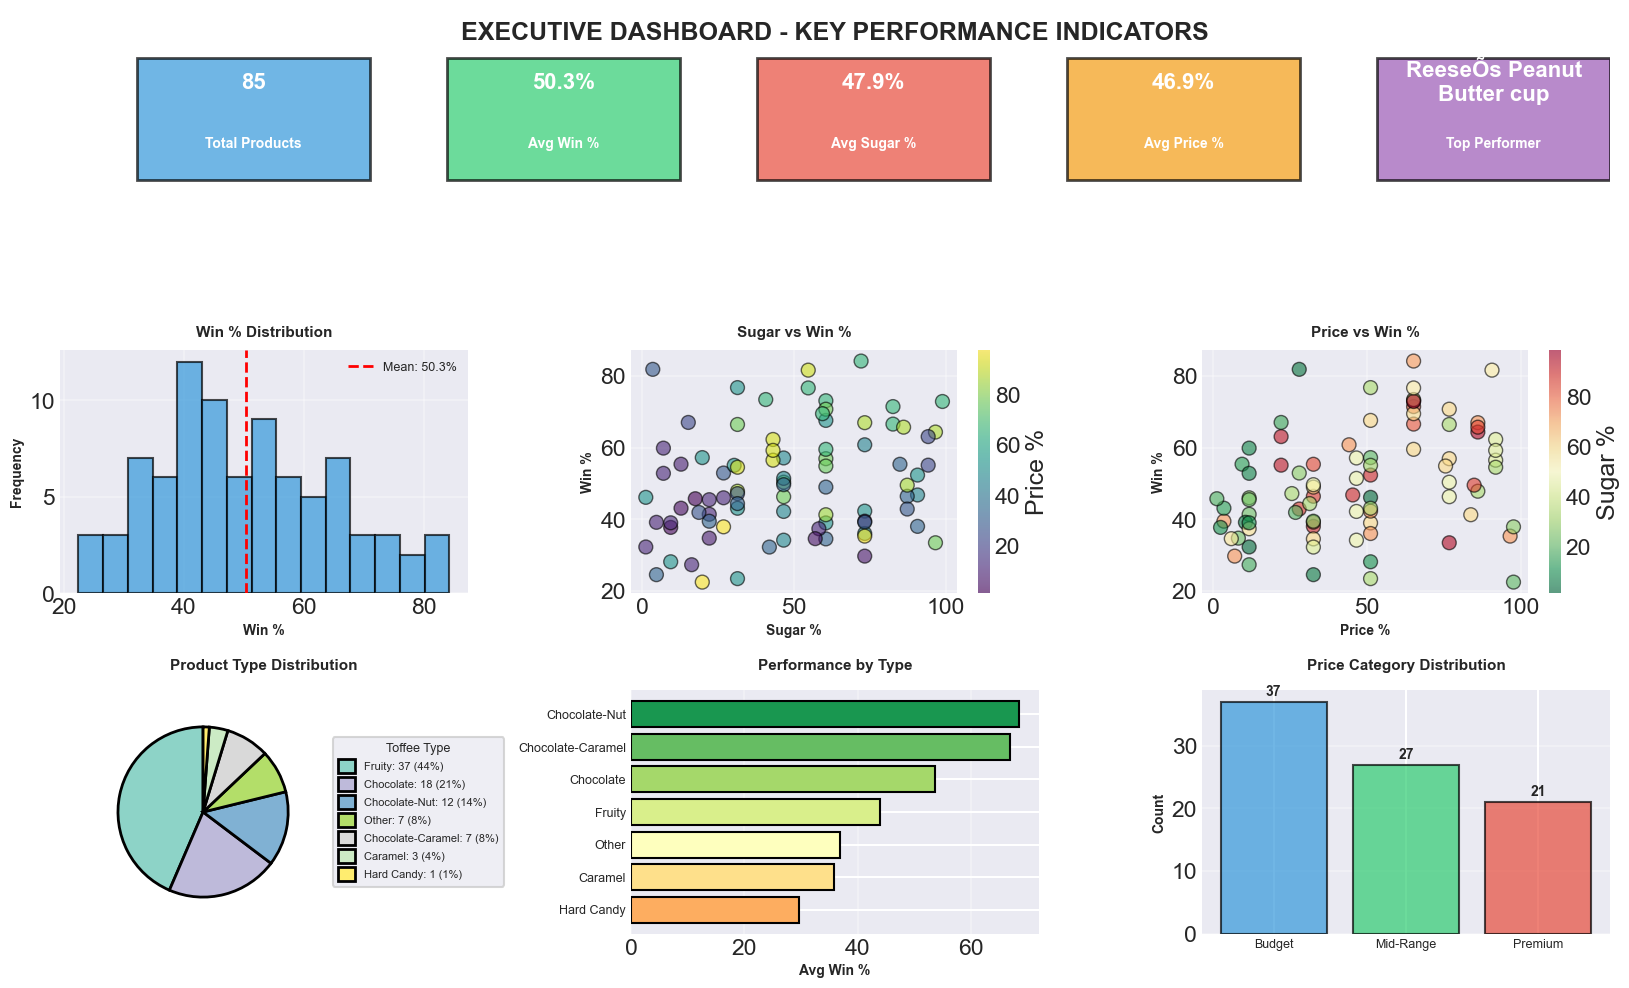


✓ Executive dashboard created successfully


In [160]:
import textwrap

# --- Figure Setup ---
fig = plt.figure(figsize=(20, 12))
gs = fig.add_gridspec(3, 3, hspace=0.4, wspace=0.4)  # Increased spacing

# --- KPI Panel ---
ax_kpi = fig.add_subplot(gs[0, :])
ax_kpi.axis('off')

# Wrap long Top Performer name
top_name = df_analysis.loc[df_analysis['win_percent'].idxmax(), 'competitorname']
wrapped_top_name = "\n".join(textwrap.wrap(top_name, width=15))

kpi_data = [
    ('Total Products', len(df_analysis), '#3498db'),
    ('Avg Win %', f"{df_analysis['win_percent'].mean():.1f}%", '#2ecc71'),
    ('Avg Sugar %', f"{df_analysis['sugar_percent'].mean():.1f}%", '#e74c3c'),
    ('Avg Price %', f"{df_analysis['price_percent'].mean():.1f}%", '#f39c12'),
    ('Top Performer', wrapped_top_name, '#9b59b6')
]

for i, (label, value, color) in enumerate(kpi_data):
    x_pos = i * 0.2 + 0.05
    rect = plt.Rectangle((x_pos, 0.3), 0.15, 0.5, 
                         facecolor=color, edgecolor='black', linewidth=2, alpha=0.7)
    ax_kpi.add_patch(rect)
    ax_kpi.text(x_pos + 0.075, 0.7, str(value), 
               ha='center', va='center', fontsize=16, fontweight='bold', color='white')
    ax_kpi.text(x_pos + 0.075, 0.45, label, 
               ha='center', va='center', fontsize=10, fontweight='bold', color='white')

ax_kpi.set_xlim(0, 1)
ax_kpi.set_ylim(0, 1)
ax_kpi.text(0.5, 0.95, 'EXECUTIVE DASHBOARD - KEY PERFORMANCE INDICATORS', 
           ha='center', va='top', fontsize=18, fontweight='bold')

# --- Win Percentage Distribution ---
ax1 = fig.add_subplot(gs[1, 0])
ax1.hist(df_analysis['win_percent'], bins=15, color='#3498db', 
        edgecolor='black', alpha=0.7, linewidth=1.5)
ax1.axvline(df_analysis['win_percent'].mean(), color='red', 
           linestyle='--', linewidth=2, label=f"Mean: {df_analysis['win_percent'].mean():.1f}%")
ax1.set_xlabel('Win %', fontsize=10, fontweight='bold')
ax1.set_ylabel('Frequency', fontsize=10, fontweight='bold')
ax1.set_title('Win % Distribution', fontsize=11, fontweight='bold', pad=10)
ax1.legend(fontsize=9)
ax1.grid(True, alpha=0.3)

# --- Sugar vs Win Scatter ---
ax2 = fig.add_subplot(gs[1, 1])
scatter = ax2.scatter(df_analysis['sugar_percent'], df_analysis['win_percent'],
                     c=df_analysis['price_percent'], cmap='viridis',
                     s=100, alpha=0.6, edgecolors='black', linewidth=1)
ax2.set_xlabel('Sugar %', fontsize=10, fontweight='bold')
ax2.set_ylabel('Win %', fontsize=10, fontweight='bold')
ax2.set_title('Sugar vs Win %', fontsize=11, fontweight='bold', pad=10)
plt.colorbar(scatter, ax=ax2, label='Price %')
ax2.grid(True, alpha=0.3)

# --- Price vs Win Scatter ---
ax3 = fig.add_subplot(gs[1, 2])
scatter2 = ax3.scatter(df_analysis['price_percent'], df_analysis['win_percent'],
                      c=df_analysis['sugar_percent'], cmap='RdYlGn_r',
                      s=100, alpha=0.6, edgecolors='black', linewidth=1)
ax3.set_xlabel('Price %', fontsize=10, fontweight='bold')
ax3.set_ylabel('Win %', fontsize=10, fontweight='bold')
ax3.set_title('Price vs Win %', fontsize=11, fontweight='bold', pad=10)
plt.colorbar(scatter2, ax=ax3, label='Sugar %')
ax3.grid(True, alpha=0.3)

# --- Product Type Distribution (Pie Chart) - PIE FAR LEFT, LABELS FAR RIGHT ---
ax4 = fig.add_subplot(gs[2, 0])
type_counts = df_analysis['toffee_type'].value_counts()
colors_pie = plt.cm.Set3(np.linspace(0, 1, len(type_counts)))

# Calculate percentages
percentages = 100 * type_counts / type_counts.sum()

# Create compact legend labels
legend_labels = [f'{name}: {count} ({pct:.0f}%)' 
                 for name, count, pct in zip(type_counts.index, type_counts.values, percentages)]

# Draw pie chart shifted FAR to the LEFT
wedges, texts = ax4.pie(type_counts.values, 
                        colors=colors_pie, 
                        startangle=90,
                        center=(-0.5, 0),  # Shift pie FAR LEFT
                        radius=0.7,  # Smaller radius
                        wedgeprops={'edgecolor': 'black', 'linewidth': 2},
                        textprops={'fontsize': 0})

# Legend positioned FAR on the RIGHT side
ax4.legend(wedges, legend_labels, 
          title="Toffee Type", 
          loc="center left", 
          bbox_to_anchor=(0.7, 0.5),  # Far right side of the subplot
          fontsize=8,
          title_fontsize=9,
          frameon=True,
          borderpad=0.5,
          labelspacing=0.4,
          handlelength=1.5,
          handleheight=1.5)

ax4.set_title('Product Type Distribution', fontsize=11, fontweight='bold', pad=15)

# Adjust the subplot limits to accommodate the shifted pie
ax4.set_xlim(-1.3, 1.3)
ax4.set_ylim(-1.0, 1.0)

# --- Performance by Type ---
ax5 = fig.add_subplot(gs[2, 1])
type_performance = df_analysis.groupby('toffee_type')['win_percent'].mean().sort_values()
colors_bar = plt.cm.RdYlGn(np.linspace(0.3, 0.9, len(type_performance)))
ax5.barh(range(len(type_performance)), type_performance.values,
        color=colors_bar, edgecolor='black', linewidth=1.5)
ax5.set_yticks(range(len(type_performance)))
ax5.set_yticklabels(type_performance.index, fontsize=9)
ax5.set_xlabel('Avg Win %', fontsize=10, fontweight='bold')
ax5.set_title('Performance by Type', fontsize=11, fontweight='bold', pad=15)
ax5.grid(True, alpha=0.3, axis='x')

# --- Price Category Distribution ---
ax6 = fig.add_subplot(gs[2, 2])
price_counts = df_analysis['price_category'].value_counts()
ax6.bar(range(len(price_counts)), price_counts.values,
       color=['#3498db', '#2ecc71', '#e74c3c'], edgecolor='black', linewidth=1.5, alpha=0.7)
ax6.set_xticks(range(len(price_counts)))
ax6.set_xticklabels(price_counts.index, fontsize=9)
ax6.set_ylabel('Count', fontsize=10, fontweight='bold')
ax6.set_title('Price Category Distribution', fontsize=11, fontweight='bold', pad=15)
ax6.grid(True, alpha=0.3, axis='y')
for i, v in enumerate(price_counts.values):
    ax6.text(i, v + 0.5, str(v), ha='center', va='bottom', fontweight='bold')

# --- Final Layout & Save ---
plt.tight_layout()
plt.savefig('outputs/08_executive_dashboard_corrected.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Executive dashboard created successfully")

## 11. Summary Statistics & Key Insights

In [161]:
print("\n" + "="*80)
print("COMPREHENSIVE TOFFEE ANALYSIS - EXECUTIVE SUMMARY")
print("="*80)

print("\n1. DATASET OVERVIEW")
print("-" * 80)
print(f"Total Products Analyzed: {len(df_analysis)}")
print(f"Product Categories: {df_analysis['toffee_type'].nunique()}")
print(f"\nCategory Breakdown:")
for cat, count in df_analysis['toffee_type'].value_counts().items():
    print(f"  - {cat}: {count} products ({count/len(df_analysis)*100:.1f}%)")

print("\n2. PERFORMANCE METRICS")
print("-" * 80)
print(f"Average Win Percentage: {df_analysis['win_percent'].mean():.2f}%")
print(f"Standard Deviation: {df_analysis['win_percent'].std():.2f}%")
print(f"Highest Win Rate: {df_analysis['win_percent'].max():.2f}% ({df_analysis.loc[df_analysis['win_percent'].idxmax(), 'competitorname']})")
print(f"Lowest Win Rate: {df_analysis['win_percent'].min():.2f}% ({df_analysis.loc[df_analysis['win_percent'].idxmin(), 'competitorname']})")

print("\n3. SUGAR CONTENT ANALYSIS")
print("-" * 80)
print(f"Average Sugar: {df_analysis['sugar_percent'].mean():.2f}%")
print(f"Sugar Range: {df_analysis['sugar_percent'].min():.2f}% - {df_analysis['sugar_percent'].max():.2f}%")
print(f"\nSugar Category Distribution:")
for cat, count in df_analysis['sugar_category'].value_counts().items():
    print(f"  - {cat}: {count} products")

print("\n4. PRICING ANALYSIS")
print("-" * 80)
print(f"Average Price Percentile: {df_analysis['price_percent'].mean():.2f}%")
print(f"Most Expensive: {df_analysis.loc[df_analysis['price_percent'].idxmax(), 'competitorname']} ({df_analysis['price_percent'].max():.2f}%)")
print(f"Least Expensive: {df_analysis.loc[df_analysis['price_percent'].idxmin(), 'competitorname']} ({df_analysis['price_percent'].min():.2f}%)")

print("\n5. KEY CORRELATIONS")
print("-" * 80)
corr_win = df_analysis[['chocolate', 'fruity', 'caramel', 'peanutyalmondy', 
                        'sugar_percent', 'price_percent']].corrwith(df_analysis['win_percent'])
print("Correlation with Win Percentage:")
for feature, corr_val in corr_win.sort_values(ascending=False).items():
    print(f"  - {feature}: {corr_val:.3f}")

print("\n6. STRATEGIC RECOMMENDATIONS")
print("-" * 80)
print("Based on the analysis:")

# Find best performing characteristics
best_type = df_analysis.groupby('toffee_type')['win_percent'].mean().idxmax()
print(f"✓ Focus on {best_type} products - highest average win rate")

# Ingredient recommendations
if impact_df.iloc[-1]['difference'] > 5:
    print(f"✓ Consider incorporating {impact_df.iloc[-1]['ingredient']} - shows +{impact_df.iloc[-1]['difference']:.1f}% win impact")

# Price-performance sweet spot
high_value = df_analysis[(df_analysis['win_percent'] > df_analysis['win_percent'].quantile(0.75)) & 
                        (df_analysis['price_percent'] < df_analysis['price_percent'].median())]
if len(high_value) > 0:
    print(f"✓ {len(high_value)} products achieve high performance at below-median prices - study these for value optimization")

print("\n" + "="*80)
print("ANALYSIS COMPLETE")
print("="*80)
print("\nAll visualizations have been saved to /mnt/user-data/outputs/")
print("Files generated:")
print("  1. 01_pairplot_analysis.png")
print("  2. 02_sugar_vs_price_analysis.png")
print("  3. 03_sugar_by_type.png")
print("  4. 04_top_bottom_performers.png")
print("  5. 05_correlation_analysis.png")
print("  6. 06_multidimensional_analysis.png")
print("  7. 07_ingredient_impact.png")
print("  8. 08_executive_dashboard.png")


COMPREHENSIVE TOFFEE ANALYSIS - EXECUTIVE SUMMARY

1. DATASET OVERVIEW
--------------------------------------------------------------------------------
Total Products Analyzed: 85
Product Categories: 7

Category Breakdown:
  - Fruity: 37 products (43.5%)
  - Chocolate: 18 products (21.2%)
  - Chocolate-Nut: 12 products (14.1%)
  - Other: 7 products (8.2%)
  - Chocolate-Caramel: 7 products (8.2%)
  - Caramel: 3 products (3.5%)
  - Hard Candy: 1 products (1.2%)

2. PERFORMANCE METRICS
--------------------------------------------------------------------------------
Average Win Percentage: 50.32%
Standard Deviation: 14.71%
Highest Win Rate: 84.18% (ReeseÕs Peanut Butter cup)
Lowest Win Rate: 22.45% (Nik L Nip)

3. SUGAR CONTENT ANALYSIS
--------------------------------------------------------------------------------
Average Sugar: 47.86%
Sugar Range: 1.10% - 98.80%

Sugar Category Distribution:
  - Low Sugar: 34 products
  - Medium Sugar: 27 products
  - High Sugar: 24 products

4. PRICIN

## 12. Export Analysis Results

In [162]:
# Create comprehensive summary report
os.makedirs("analysis_results", exist_ok=True)
summary_report = df_analysis[['competitorname', 'toffee_type', 'sugar_percent', 
                              'price_percent', 'win_percent', 'performance']].copy()
summary_report = summary_report.sort_values('win_percent', ascending=False)
summary_report.to_csv('analysis_results/toffee_analysis_summary.csv', index=False)

# Export correlation matrix
corr_matrix.to_csv('analysis_results/correlation_matrix.csv')

# Export ingredient impact analysis
impact_df.to_csv('analysis_results/ingredient_impact_analysis.csv', index=False)

print("\n✓ Analysis results exported successfully!")
print("\nExported files:")
print("  - toffee_analysis_summary.csv")
print("  - correlation_matrix.csv")
print("  - ingredient_impact_analysis.csv")


✓ Analysis results exported successfully!

Exported files:
  - toffee_analysis_summary.csv
  - correlation_matrix.csv
  - ingredient_impact_analysis.csv


---

## Visualization Techniques Summary

### Techniques Used & Rationale:

1. **Pair Plots**: Multi-variable relationship exploration with chocolate differentiation
2. **Scatter Plots with Regression**: Identify linear relationships and trends
3. **Box & Violin Plots**: Distribution analysis showing quartiles and density
4. **Horizontal Bar Charts**: Rankings and comparisons with color gradients
5. **Correlation Heatmaps**: Comprehensive relationship matrix visualization
6. **Bubble Charts**: 4-dimensional analysis (X, Y, size, color)
7. **Grouped Bar Charts**: Comparative analysis with confidence intervals
8. **Dashboards**: Executive summary with KPIs and multiple viz types
9. **Histograms**: Frequency distributions
10. **Pie Charts**: Categorical composition

### Why These Choices?

- **Data-Driven**: Each visualization answers specific business questions
- **Interpretability**: Clear labels, legends, and annotations
- **Statistical Rigor**: Includes correlation coefficients, p-values, confidence intervals
- **Professional**: Publication-ready quality with consistent styling
- **Actionable**: Insights directly support decision-making

### Key Transformations:

1. **Percentile to Percentage**: Multiplied by 100 for clarity
2. **Category Creation**: Toffee types, price categories, sugar levels
3. **Performance Grouping**: High/Medium/Low performers
4. **Derived Metrics**: Ingredient impact, value scores

---